# Spatial Occupancy Calculation Notebook

Find out which single cell heatmaps actuallly occupy the spatial range stated on the graphs

In [1]:
import os, re
import numpy as np
import tifffile as tiff
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
from pathlib import Path
import tools
import json
import pickle
# from shapely.geometry import box
# from shapely.geometry.point import Point

# Load apoptoses IDs and tracking file list

In [2]:
### load tracking data
path_to_hdf5 = '/media/nathan/Transcend/Nathan/data/h2b'
hdf5_file_list = tools.hdf5_file_finder(path_to_hdf5)


In [13]:
cell_type = 'RFP'
path_to_apop_lists = '/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/final/all'
expts_apop_lists = os.listdir(path_to_apop_lists)
apop_dict = {}
N_apops = len(expts_apop_lists)
for expt_apop_list in expts_apop_lists:
    apop_list = open(os.path.join(path_to_apop_lists, expt_apop_list), 'r')
    for apop_ID in apop_list:
        if cell_type in apop_ID:
            if 'stitched' not in apop_ID: ## relic of apoptosis finding (stitched = tracks that apoptosis switches into post apop)
                apop_dict[apop_ID.split()[0]] = apop_ID.split()[1]
orig_len_apops = len(apop_dict)
apop_dict

{'GV0804_Pos4_179_RFP': '625',
 'GV0804_Pos4_249_RFP': '850',
 'GV0804_Pos4_110_RFP': '851',
 'GV0804_Pos4_292_RFP': '902',
 'GV0804_Pos4_342_RFP': '999',
 'GV0804_Pos4_343_RFP': '1002',
 'GV0804_Pos4_231_RFP': '1010',
 'GV0804_Pos4_339_RFP': '1009',
 'GV0804_Pos4_333_RFP': '1014',
 'GV0804_Pos4_353_RFP': '1050',
 'GV0804_Pos4_351_RFP': '1084',
 'GV0804_Pos4_163_RFP': '1074',
 'GV0804_Pos4_217_RFP': '1142',
 'GV0794_Pos4_6_RFP': '469',
 'GV0794_Pos4_73_RFP': '773',
 'GV0794_Pos4_70_RFP': '820',
 'GV0794_Pos7_52_RFP': '195',
 'GV0794_Pos7_192_RFP': '258',
 'GV0794_Pos7_352_RFP': '749',
 'GV0794_Pos7_328_RFP': '827',
 'GV0794_Pos7_329_RFP': '846',
 'GV0794_Pos7_360_RFP': '874',
 'GV0794_Pos7_429_RFP': '889',
 'GV0795_Pos4_1_RFP': '6',
 'GV0795_Pos4_7_RFP': '8',
 'GV0795_Pos4_103_RFP': '472',
 'GV0795_Pos4_284_RFP': '639',
 'GV0795_Pos4_235_RFP': '642',
 'GV0795_Pos4_234_RFP': '671',
 'GV0795_Pos4_285_RFP': '654',
 'GV0795_Pos4_223_RFP': '418',
 'GV0795_Pos4_323_RFP': '956',
 'GV0795_Pos4

### Iterating through single cell numpy arrays and pulling xy coords

In [15]:
apop_ID.split('_RFP')[0]

'GV0818_Pos13_539'

In [4]:
hdf5_file_path = []
xy_dict = {}
for apop_ID in apop_dict:
    expt = 'GV' +str(re.findall(r"GV(\d+)", apop_ID)[0])
    position = re.findall(r"Pos(\d+)", apop_ID)[0]

    position = 'Pos' + position

    expt_position = os.path.join(expt,position,'') ## additional '' here so that / added to end of string
    if expt_position not in hdf5_file_path:
        ## load that track data
        print('Loading', expt_position)
        hdf5_file_path = [hdf5_file_path for hdf5_file_path in hdf5_file_list if expt_position in hdf5_file_path][0]
        wt_cells, scr_cells, all_cells = tools.load_tracking_data(hdf5_file_path)
        print('Loaded', expt_position)
    
    cell_ID = int((re.findall(r"(\d+)_.FP", apop_ID))[0])
    if cell_type == 'RFP':
        cell_ID = -cell_ID
        
    focal_time = int(apop_dict[apop_ID])
    target_cell = [cell for cell in all_cells if cell.ID == cell_ID][0]
    x, y = round(target_cell.x[target_cell.t.index(focal_time)]), round(target_cell.y[target_cell.t.index(focal_time)])

    xy_dict[apop_ID] = tuple((x,y))


[INFO][2021/04/13 04:50:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...


Loading GV0804/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:01 PM] Loading tracks/obj_type_1
[INFO][2021/04/13 04:50:03 PM] Loading objects/obj_type_1 (271439, 5) (257929 filtered: area>=100)
[INFO][2021/04/13 04:50:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:05 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:05 PM] Loading objects/obj_type_2 (42112, 5) (36481 filtered: area>=100)
[INFO][2021/04/13 04:50:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos4/
Loading GV0794/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:06 PM] Loading objects/obj_type_1 (69360, 5) (64986 filtered: area>=100)
[INFO][2021/04/13 04:50:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:07 PM] Loading objects/obj_type_2 (13865, 5) (10538 filtered: area>=100)
[INFO][2021/04/13 04:50:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos4/
Loading GV0794/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:08 PM] Loading objects/obj_type_1 (110774, 5) (102450 filtered: area>=100)
[INFO][2021/04/13 04:50:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:09 PM] Loading objects/obj_type_2 (20793, 5) (17016 filtered: area>=100)
[INFO][2021/04/13 04:50:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos7/
Loading GV0795/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:10 PM] Loading objects/obj_type_1 (211479, 5) (197642 filtered: area>=100)
[INFO][2021/04/13 04:50:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:12 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:12 PM] Loading objects/obj_type_2 (49070, 5) (38203 filtered: area>=100)
[INFO][2021/04/13 04:50:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos4/
Loading GV0795/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:14 PM] Loading objects/obj_type_1 (199943, 5) (183929 filtered: area>=100)
[INFO][2021/04/13 04:50:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:16 PM] Loading objects/obj_type_2 (80612, 5) (63990 filtered: area>=100)
[INFO][2021/04/13 04:50:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:16 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos7/
Loading GV0796/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:19 PM] Loading objects/obj_type_1 (441082, 5) (424178 filtered: area>=100)
[INFO][2021/04/13 04:50:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:23 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:23 PM] Loading objects/obj_type_2 (72743, 5) (60501 filtered: area>=100)
[INFO][2021/04/13 04:50:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:24 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos4/
Loading GV0796/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:27 PM] Loading objects/obj_type_1 (510473, 5) (495699 filtered: area>=100)
[INFO][2021/04/13 04:50:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:32 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:32 PM] Loading objects/obj_type_2 (76238, 5) (63068 filtered: area>=100)
[INFO][2021/04/13 04:50:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos7/
Loading GV0797/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:35 PM] Loading objects/obj_type_1 (298548, 5) (283305 filtered: area>=100)
[INFO][2021/04/13 04:50:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:38 PM] Loading objects/obj_type_2 (52032, 5) (37211 filtered: area>=100)
[INFO][2021/04/13 04:50:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos4/
Loading GV0797/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:40 PM] Loading objects/obj_type_1 (207794, 5) (196573 filtered: area>=100)
[INFO][2021/04/13 04:50:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:42 PM] Loading objects/obj_type_2 (22939, 5) (18826 filtered: area>=100)
[INFO][2021/04/13 04:50:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:42 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos7/
Loading GV0798/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:44 PM] Loading objects/obj_type_1 (233782, 5) (224796 filtered: area>=100)
[INFO][2021/04/13 04:50:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:46 PM] Loading objects/obj_type_2 (33185, 5) (26688 filtered: area>=100)
[INFO][2021/04/13 04:50:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos4/
Loading GV0798/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:48 PM] Loading objects/obj_type_1 (264968, 5) (250270 filtered: area>=100)
[INFO][2021/04/13 04:50:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:51 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:51 PM] Loading objects/obj_type_2 (34780, 5) (28039 filtered: area>=100)
[INFO][2021/04/13 04:50:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos7/
Loading GV0800/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:50:54 PM] Loading objects/obj_type_1 (293631, 5) (274724 filtered: area>=100)
[INFO][2021/04/13 04:50:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:57 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:50:58 PM] Loading objects/obj_type_2 (60789, 5) (49434 filtered: area>=100)
[INFO][2021/04/13 04:50:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:50:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:50:59 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos4/
Loading GV0800/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:01 PM] Loading objects/obj_type_1 (299894, 5) (277008 filtered: area>=100)
[INFO][2021/04/13 04:51:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:04 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:04 PM] Loading objects/obj_type_2 (53124, 5) (43280 filtered: area>=100)
[INFO][2021/04/13 04:51:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos7/
Loading GV0795/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:06 PM] Loading objects/obj_type_1 (142287, 5) (125195 filtered: area>=100)
[INFO][2021/04/13 04:51:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:07 PM] Loading objects/obj_type_2 (36319, 5) (29965 filtered: area>=100)
[INFO][2021/04/13 04:51:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos17/
Loading GV0796/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:09 PM] Loading objects/obj_type_1 (307793, 5) (293005 filtered: area>=100)
[INFO][2021/04/13 04:51:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:12 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:12 PM] Loading objects/obj_type_2 (46439, 5) (38835 filtered: area>=100)
[INFO][2021/04/13 04:51:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos21/
Loading GV0796/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:15 PM] Loading objects/obj_type_1 (388884, 5) (377860 filtered: area>=100)
[INFO][2021/04/13 04:51:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:20 PM] Loading objects/obj_type_2 (63131, 5) (54866 filtered: area>=100)
[INFO][2021/04/13 04:51:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos22/
Loading GV0797/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:22 PM] Loading objects/obj_type_1 (193103, 5) (183703 filtered: area>=100)
[INFO][2021/04/13 04:51:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:23 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:24 PM] Loading objects/obj_type_2 (12311, 5) (8874 filtered: area>=100)
[INFO][2021/04/13 04:51:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:24 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos20/
Loading GV0797/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:26 PM] Loading objects/obj_type_1 (211568, 5) (195992 filtered: area>=100)
[INFO][2021/04/13 04:51:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:29 PM] Loading objects/obj_type_2 (26227, 5) (20975 filtered: area>=100)
[INFO][2021/04/13 04:51:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos21/
Loading GV0798/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:31 PM] Loading objects/obj_type_1 (192967, 5) (184679 filtered: area>=100)
[INFO][2021/04/13 04:51:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:33 PM] Loading objects/obj_type_2 (51909, 5) (44768 filtered: area>=100)
[INFO][2021/04/13 04:51:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:34 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos20/
Loading GV0798/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:36 PM] Loading objects/obj_type_1 (332657, 5) (316064 filtered: area>=100)
[INFO][2021/04/13 04:51:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:40 PM] Loading objects/obj_type_2 (59184, 5) (40538 filtered: area>=100)
[INFO][2021/04/13 04:51:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos21/
Loading GV0801/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:43 PM] Loading objects/obj_type_1 (315086, 5) (299584 filtered: area>=100)
[INFO][2021/04/13 04:51:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:48 PM] Loading objects/obj_type_2 (60246, 5) (49441 filtered: area>=100)
[INFO][2021/04/13 04:51:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:49 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos4/
Loading GV0802/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:51 PM] Loading objects/obj_type_1 (351066, 5) (338199 filtered: area>=100)
[INFO][2021/04/13 04:51:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:54 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:51:55 PM] Loading objects/obj_type_2 (32989, 5) (27879 filtered: area>=100)
[INFO][2021/04/13 04:51:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:51:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:51:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos4/
Loading GV0805/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:51:58 PM] Loading objects/obj_type_1 (349354, 5) (331443 filtered: area>=100)
[INFO][2021/04/13 04:52:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:01 PM] Loading objects/obj_type_2 (54322, 5) (47931 filtered: area>=100)
[INFO][2021/04/13 04:52:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos4/
Loading GV0806/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:06 PM] Loading objects/obj_type_1 (509105, 5) (489414 filtered: area>=100)
[INFO][2021/04/13 04:52:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:13 PM] Loading objects/obj_type_2 (68404, 5) (59567 filtered: area>=100)
[INFO][2021/04/13 04:52:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos4/


[INFO][2021/04/13 04:52:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:14 PM] Loading tracks/obj_type_1


Loading GV0807/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:17 PM] Loading objects/obj_type_1 (313526, 5) (300454 filtered: area>=100)
[INFO][2021/04/13 04:52:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:22 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:23 PM] Loading objects/obj_type_2 (38098, 5) (31521 filtered: area>=100)
[INFO][2021/04/13 04:52:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:24 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos4/
Loading GV0820/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:25 PM] Loading objects/obj_type_1 (204895, 5) (190534 filtered: area>=100)
[INFO][2021/04/13 04:52:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:28 PM] Loading objects/obj_type_2 (70432, 5) (57621 filtered: area>=100)
[INFO][2021/04/13 04:52:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:29 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos0/
Loading GV0820/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:31 PM] Loading objects/obj_type_1 (205829, 5) (191939 filtered: area>=100)
[INFO][2021/04/13 04:52:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:34 PM] Loading objects/obj_type_2 (93902, 5) (77327 filtered: area>=100)
[INFO][2021/04/13 04:52:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos1/
Loading GV0820/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:38 PM] Loading objects/obj_type_1 (187834, 5) (174544 filtered: area>=100)
[INFO][2021/04/13 04:52:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:41 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:41 PM] Loading objects/obj_type_2 (73959, 5) (62237 filtered: area>=100)
[INFO][2021/04/13 04:52:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:42 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos2/
Loading GV0820/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:44 PM] Loading objects/obj_type_1 (191590, 5) (179288 filtered: area>=100)
[INFO][2021/04/13 04:52:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:46 PM] Loading objects/obj_type_2 (65619, 5) (55005 filtered: area>=100)
[INFO][2021/04/13 04:52:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:46 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos3/
Loading GV0820/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:47 PM] Loading objects/obj_type_1 (189653, 5) (175798 filtered: area>=100)
[INFO][2021/04/13 04:52:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:49 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:49 PM] Loading objects/obj_type_2 (82474, 5) (72948 filtered: area>=100)
[INFO][2021/04/13 04:52:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos4/
Loading GV0820/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:52 PM] Loading objects/obj_type_1 (168718, 5) (157112 filtered: area>=100)
[INFO][2021/04/13 04:52:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:52:55 PM] Loading objects/obj_type_2 (75424, 5) (61898 filtered: area>=100)
[INFO][2021/04/13 04:52:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:57 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos5/
Loading GV0796/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:52:58 PM] Loading objects/obj_type_1 (111905, 5) (102407 filtered: area>=100)
[INFO][2021/04/13 04:52:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:52:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:52:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:00 PM] Loading objects/obj_type_2 (125793, 5) (96319 filtered: area>=100)
[INFO][2021/04/13 04:53:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos5/


[INFO][2021/04/13 04:53:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:02 PM] Loading tracks/obj_type_1


Loading GV0796/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:02 PM] Loading objects/obj_type_1 (70354, 5) (57413 filtered: area>=100)
[INFO][2021/04/13 04:53:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:04 PM] Loading objects/obj_type_2 (88276, 5) (68435 filtered: area>=100)
[INFO][2021/04/13 04:53:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos6/
Loading GV0797/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:05 PM] Loading objects/obj_type_1 (83742, 5) (65837 filtered: area>=100)
[INFO][2021/04/13 04:53:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:06 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:06 PM] Loading objects/obj_type_2 (22517, 5) (15314 filtered: area>=100)
[INFO][2021/04/13 04:53:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:06 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos5/
Loading GV0797/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:07 PM] Loading objects/obj_type_1 (53866, 5) (44492 filtered: area>=100)
[INFO][2021/04/13 04:53:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:08 PM] Loading objects/obj_type_2 (60337, 5) (42952 filtered: area>=100)
[INFO][2021/04/13 04:53:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:08 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos6/
Loading GV0798/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:08 PM] Loading objects/obj_type_1 (40829, 5) (33345 filtered: area>=100)
[INFO][2021/04/13 04:53:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:09 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:09 PM] Loading objects/obj_type_2 (62601, 5) (49976 filtered: area>=100)
[INFO][2021/04/13 04:53:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:10 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos5/
Loading GV0798/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:10 PM] Loading objects/obj_type_1 (87350, 5) (79247 filtered: area>=100)
[INFO][2021/04/13 04:53:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:12 PM] Loading objects/obj_type_2 (81755, 5) (62545 filtered: area>=100)
[INFO][2021/04/13 04:53:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:12 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos6/
Loading GV0800/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:13 PM] Loading objects/obj_type_1 (39998, 5) (30974 filtered: area>=100)
[INFO][2021/04/13 04:53:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:13 PM] Loading objects/obj_type_2 (56244, 5) (41825 filtered: area>=100)
[INFO][2021/04/13 04:53:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:14 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos5/
Loading GV0800/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:14 PM] Loading objects/obj_type_1 (52406, 5) (44528 filtered: area>=100)
[INFO][2021/04/13 04:53:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:16 PM] Loading objects/obj_type_2 (113641, 5) (87932 filtered: area>=100)
[INFO][2021/04/13 04:53:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:17 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos6/
Loading GV0801/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:18 PM] Loading objects/obj_type_1 (109693, 5) (98799 filtered: area>=100)
[INFO][2021/04/13 04:53:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:19 PM] Loading objects/obj_type_2 (172185, 5) (145089 filtered: area>=100)
[INFO][2021/04/13 04:53:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:21 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos5/
Loading GV0802/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:21 PM] Loading objects/obj_type_1 (49875, 5) (41993 filtered: area>=100)
[INFO][2021/04/13 04:53:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:22 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:22 PM] Loading objects/obj_type_2 (87129, 5) (71072 filtered: area>=100)
[INFO][2021/04/13 04:53:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:23 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos5/
Loading GV0804/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:24 PM] Loading objects/obj_type_1 (108652, 5) (92224 filtered: area>=100)
[INFO][2021/04/13 04:53:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:25 PM] Loading objects/obj_type_2 (93166, 5) (75916 filtered: area>=100)
[INFO][2021/04/13 04:53:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:26 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos5/
Loading GV0805/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:27 PM] Loading objects/obj_type_1 (59442, 5) (48237 filtered: area>=100)
[INFO][2021/04/13 04:53:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:28 PM] Loading objects/obj_type_2 (110498, 5) (92236 filtered: area>=100)
[INFO][2021/04/13 04:53:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos5/
Loading GV0806/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:31 PM] Loading objects/obj_type_1 (76725, 5) (65455 filtered: area>=100)
[INFO][2021/04/13 04:53:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:31 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:31 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:32 PM] Loading objects/obj_type_2 (76899, 5) (56104 filtered: area>=100)
[INFO][2021/04/13 04:53:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos5/
Loading GV0807/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:34 PM] Loading objects/obj_type_1 (129954, 5) (111411 filtered: area>=100)
[INFO][2021/04/13 04:53:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:35 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:35 PM] Loading objects/obj_type_2 (87213, 5) (74295 filtered: area>=100)
[INFO][2021/04/13 04:53:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:36 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos5/
Loading GV0800/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:39 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2021/04/13 04:53:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:43 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:43 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2021/04/13 04:53:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:44 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos16/
Loading GV0795/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:45 PM] Loading objects/obj_type_1 (41273, 5) (28239 filtered: area>=100)
[INFO][2021/04/13 04:53:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:46 PM] Loading objects/obj_type_2 (71063, 5) (58416 filtered: area>=100)
[INFO][2021/04/13 04:53:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos18/
Loading GV0796/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:48 PM] Loading objects/obj_type_1 (95277, 5) (83305 filtered: area>=100)
[INFO][2021/04/13 04:53:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:51 PM] Loading objects/obj_type_2 (126378, 5) (98072 filtered: area>=100)
[INFO][2021/04/13 04:53:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos23/
Loading GV0796/Pos24/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:52 PM] Loading objects/obj_type_1 (85037, 5) (73583 filtered: area>=100)
[INFO][2021/04/13 04:53:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:54 PM] Loading objects/obj_type_2 (132294, 5) (100961 filtered: area>=100)
[INFO][2021/04/13 04:53:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos24/


[INFO][2021/04/13 04:53:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:56 PM] Loading tracks/obj_type_1


Loading GV0797/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:57 PM] Loading objects/obj_type_1 (34660, 5) (27773 filtered: area>=100)
[INFO][2021/04/13 04:53:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:57 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:58 PM] Loading objects/obj_type_2 (53322, 5) (37156 filtered: area>=100)
[INFO][2021/04/13 04:53:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:58 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:58 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos22/
Loading GV0797/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:58 PM] Loading objects/obj_type_1 (23980, 5) (18959 filtered: area>=100)
[INFO][2021/04/13 04:53:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:58 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:53:59 PM] Loading objects/obj_type_2 (34897, 5) (24894 filtered: area>=100)
[INFO][2021/04/13 04:53:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:53:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:53:59 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos23/
Loading GV0798/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:53:59 PM] Loading objects/obj_type_1 (54200, 5) (44110 filtered: area>=100)
[INFO][2021/04/13 04:54:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:00 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:00 PM] Loading objects/obj_type_2 (43364, 5) (33560 filtered: area>=100)
[INFO][2021/04/13 04:54:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos22/
Loading GV0798/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:01 PM] Loading objects/obj_type_1 (122661, 5) (114306 filtered: area>=100)
[INFO][2021/04/13 04:54:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:03 PM] Loading objects/obj_type_2 (120909, 5) (98424 filtered: area>=100)
[INFO][2021/04/13 04:54:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:04 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos23/
Loading GV0800/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:04 PM] Loading objects/obj_type_1 (102414, 5) (89276 filtered: area>=100)
[INFO][2021/04/13 04:54:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:05 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:06 PM] Loading objects/obj_type_2 (83250, 5) (67284 filtered: area>=100)
[INFO][2021/04/13 04:54:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos17/
Loading GV0794/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:07 PM] Loading objects/obj_type_1 (101301, 5) (96819 filtered: area>=100)
[INFO][2021/04/13 04:54:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:08 PM] Loading objects/obj_type_2 (4133, 5) (3527 filtered: area>=100)
[INFO][2021/04/13 04:54:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:08 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos8/
Loading GV0795/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:10 PM] Loading objects/obj_type_1 (274100, 5) (263837 filtered: area>=100)
[INFO][2021/04/13 04:54:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:13 PM] Loading objects/obj_type_2 (16554, 5) (13970 filtered: area>=100)
[INFO][2021/04/13 04:54:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos3/
Loading GV0795/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:15 PM] Loading objects/obj_type_1 (273725, 5) (262060 filtered: area>=100)
[INFO][2021/04/13 04:54:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:18 PM] Loading objects/obj_type_2 (12522, 5) (9142 filtered: area>=100)
[INFO][2021/04/13 04:54:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:18 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos8/
Loading GV0796/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:22 PM] Loading objects/obj_type_1 (683581, 5) (648688 filtered: area>=100)
[INFO][2021/04/13 04:54:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:28 PM] Loading objects/obj_type_2 (16040, 5) (13600 filtered: area>=100)
[INFO][2021/04/13 04:54:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos3/
Loading GV0796/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:31 PM] Loading objects/obj_type_1 (459180, 5) (445430 filtered: area>=100)
[INFO][2021/04/13 04:54:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:35 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:35 PM] Loading objects/obj_type_2 (10613, 5) (8656 filtered: area>=100)
[INFO][2021/04/13 04:54:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:36 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos8/
Loading GV0797/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:38 PM] Loading objects/obj_type_1 (449659, 5) (433455 filtered: area>=100)
[INFO][2021/04/13 04:54:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:42 PM] Loading objects/obj_type_2 (13399, 5) (10705 filtered: area>=100)
[INFO][2021/04/13 04:54:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:43 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos3/
Loading GV0797/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:45 PM] Loading objects/obj_type_1 (294496, 5) (285144 filtered: area>=100)
[INFO][2021/04/13 04:54:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:47 PM] Loading objects/obj_type_2 (6854, 5) (5414 filtered: area>=100)
[INFO][2021/04/13 04:54:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos8/
Loading GV0798/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:49 PM] Loading objects/obj_type_1 (286320, 5) (277358 filtered: area>=100)
[INFO][2021/04/13 04:54:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:52 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:54:52 PM] Loading objects/obj_type_2 (9028, 5) (8305 filtered: area>=100)
[INFO][2021/04/13 04:54:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:54:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:54:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos8/
Loading GV0800/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:54:55 PM] Loading objects/obj_type_1 (466461, 5) (444022 filtered: area>=100)
[INFO][2021/04/13 04:55:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:01 PM] Loading objects/obj_type_2 (9696, 5) (7037 filtered: area>=100)
[INFO][2021/04/13 04:55:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos3/
Loading GV0800/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:04 PM] Loading objects/obj_type_1 (412266, 5) (393638 filtered: area>=100)
[INFO][2021/04/13 04:55:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:08 PM] Loading objects/obj_type_2 (16111, 5) (12664 filtered: area>=100)
[INFO][2021/04/13 04:55:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:08 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos8/
Loading GV0801/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:12 PM] Loading objects/obj_type_1 (467654, 5) (443294 filtered: area>=100)
[INFO][2021/04/13 04:55:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:16 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:16 PM] Loading objects/obj_type_2 (30547, 5) (26081 filtered: area>=100)
[INFO][2021/04/13 04:55:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:17 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos3/
Loading GV0802/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:22 PM] Loading objects/obj_type_1 (660140, 5) (631868 filtered: area>=100)
[INFO][2021/04/13 04:55:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:29 PM] Loading objects/obj_type_2 (23947, 5) (20889 filtered: area>=100)
[INFO][2021/04/13 04:55:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos3/
Loading GV0805/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:33 PM] Loading objects/obj_type_1 (518517, 5) (489660 filtered: area>=100)
[INFO][2021/04/13 04:55:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:38 PM] Loading objects/obj_type_2 (16677, 5) (12311 filtered: area>=100)
[INFO][2021/04/13 04:55:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos3/
Loading GV0806/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:47 PM] Loading objects/obj_type_1 (704893, 5) (675206 filtered: area>=100)
[INFO][2021/04/13 04:55:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:54 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:55:54 PM] Loading objects/obj_type_2 (18126, 5) (15960 filtered: area>=100)
[INFO][2021/04/13 04:55:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:55:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:55:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos3/
Loading GV0807/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:55:57 PM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/04/13 04:56:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:01 PM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/04/13 04:56:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:01 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos3/
Loading GV0813/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:02 PM] Loading objects/obj_type_1 (85389, 5) (80063 filtered: area>=100)
[INFO][2021/04/13 04:56:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:03 PM] Loading objects/obj_type_2 (20301, 5) (17076 filtered: area>=100)
[INFO][2021/04/13 04:56:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:03 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos0/
Loading GV0813/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:04 PM] Loading objects/obj_type_1 (149696, 5) (120384 filtered: area>=100)
[INFO][2021/04/13 04:56:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:05 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:05 PM] Loading objects/obj_type_2 (30851, 5) (22174 filtered: area>=100)
[INFO][2021/04/13 04:56:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos1/
Loading GV0813/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:06 PM] Loading objects/obj_type_1 (142719, 5) (105609 filtered: area>=100)
[INFO][2021/04/13 04:56:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:07 PM] Loading objects/obj_type_2 (22756, 5) (19093 filtered: area>=100)
[INFO][2021/04/13 04:56:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:08 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos2/
Loading GV0813/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:09 PM] Loading objects/obj_type_1 (153611, 5) (136100 filtered: area>=100)
[INFO][2021/04/13 04:56:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:10 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:10 PM] Loading objects/obj_type_2 (28558, 5) (22223 filtered: area>=100)
[INFO][2021/04/13 04:56:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:10 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos3/
Loading GV0813/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:11 PM] Loading objects/obj_type_1 (150938, 5) (131031 filtered: area>=100)
[INFO][2021/04/13 04:56:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:12 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:13 PM] Loading objects/obj_type_2 (39270, 5) (29540 filtered: area>=100)
[INFO][2021/04/13 04:56:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos4/
Loading GV0813/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:14 PM] Loading objects/obj_type_1 (160205, 5) (133425 filtered: area>=100)
[INFO][2021/04/13 04:56:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:15 PM] Loading objects/obj_type_2 (23703, 5) (19617 filtered: area>=100)
[INFO][2021/04/13 04:56:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:16 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos5/
Loading GV0814/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:17 PM] Loading objects/obj_type_1 (134206, 5) (118580 filtered: area>=100)
[INFO][2021/04/13 04:56:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:18 PM] Loading objects/obj_type_2 (41136, 5) (25703 filtered: area>=100)
[INFO][2021/04/13 04:56:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:19 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos0/
Loading GV0815/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:21 PM] Loading objects/obj_type_1 (286968, 5) (261403 filtered: area>=100)
[INFO][2021/04/13 04:56:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:25 PM] Loading objects/obj_type_2 (85143, 5) (68895 filtered: area>=100)
[INFO][2021/04/13 04:56:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos0/


[INFO][2021/04/13 04:56:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:27 PM] Loading tracks/obj_type_1


Loading GV0816/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:28 PM] Loading objects/obj_type_1 (90368, 5) (81699 filtered: area>=100)
[INFO][2021/04/13 04:56:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:29 PM] Loading objects/obj_type_2 (24057, 5) (17173 filtered: area>=100)
[INFO][2021/04/13 04:56:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:29 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos0/
Loading GV0817/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:32 PM] Loading objects/obj_type_1 (279987, 5) (256086 filtered: area>=100)
[INFO][2021/04/13 04:56:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:35 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:35 PM] Loading objects/obj_type_2 (113873, 5) (83931 filtered: area>=100)
[INFO][2021/04/13 04:56:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:36 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos0/
Loading GV0819/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:38 PM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2021/04/13 04:56:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:42 PM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2021/04/13 04:56:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:43 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos0/
Loading GV0819/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:46 PM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2021/04/13 04:56:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:49 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:49 PM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2021/04/13 04:56:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos1/
Loading GV0819/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:51 PM] Loading objects/obj_type_1 (267623, 5) (252570 filtered: area>=100)
[INFO][2021/04/13 04:56:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:56:54 PM] Loading objects/obj_type_2 (113484, 5) (97628 filtered: area>=100)
[INFO][2021/04/13 04:56:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:56:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:56:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos2/
Loading GV0819/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:56:58 PM] Loading objects/obj_type_1 (444670, 5) (426511 filtered: area>=100)
[INFO][2021/04/13 04:57:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:03 PM] Loading objects/obj_type_2 (119062, 5) (102355 filtered: area>=100)
[INFO][2021/04/13 04:57:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos3/


[INFO][2021/04/13 04:57:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:04 PM] Loading tracks/obj_type_1


Loading GV0819/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:07 PM] Loading objects/obj_type_1 (393596, 5) (379449 filtered: area>=100)
[INFO][2021/04/13 04:57:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:12 PM] Loading objects/obj_type_2 (112602, 5) (100064 filtered: area>=100)
[INFO][2021/04/13 04:57:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos4/
Loading GV0819/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:15 PM] Loading objects/obj_type_1 (305714, 5) (290346 filtered: area>=100)
[INFO][2021/04/13 04:57:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:18 PM] Loading objects/obj_type_2 (84463, 5) (70183 filtered: area>=100)
[INFO][2021/04/13 04:57:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos5/
Loading GV0794/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:20 PM] Loading objects/obj_type_1 (31315, 5) (20377 filtered: area>=100)
[INFO][2021/04/13 04:57:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:20 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:21 PM] Loading objects/obj_type_2 (61992, 5) (46754 filtered: area>=100)
[INFO][2021/04/13 04:57:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:21 PM] Loading tracks/obj_type_1
[INFO][2021/04/13 04:57:21 PM] Loading objects/obj_type_1 (13419, 5) (11379 filtered: area>=100)


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos5/
Loading GV0794/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:21 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:22 PM] Loading objects/obj_type_2 (69258, 5) (48810 filtered: area>=100)
[INFO][2021/04/13 04:57:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:23 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos6/
Loading GV0795/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:23 PM] Loading objects/obj_type_1 (83531, 5) (74420 filtered: area>=100)
[INFO][2021/04/13 04:57:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:25 PM] Loading objects/obj_type_2 (98959, 5) (78503 filtered: area>=100)
[INFO][2021/04/13 04:57:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:26 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos5/
Loading GV0795/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:27 PM] Loading objects/obj_type_1 (52858, 5) (43022 filtered: area>=100)
[INFO][2021/04/13 04:57:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:28 PM] Loading objects/obj_type_2 (95556, 5) (72517 filtered: area>=100)
[INFO][2021/04/13 04:57:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:29 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos6/
Loading GV0795/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:33 PM] Loading objects/obj_type_1 (406228, 5) (386644 filtered: area>=100)
[INFO][2021/04/13 04:57:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:38 PM] Loading objects/obj_type_2 (8324, 5) (6993 filtered: area>=100)
[INFO][2021/04/13 04:57:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:38 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos16/
Loading GV0796/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:42 PM] Loading objects/obj_type_1 (506574, 5) (490755 filtered: area>=100)
[INFO][2021/04/13 04:57:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:48 PM] Loading objects/obj_type_2 (13897, 5) (11779 filtered: area>=100)
[INFO][2021/04/13 04:57:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos19/
Loading GV0796/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:52 PM] Loading objects/obj_type_1 (469347, 5) (453478 filtered: area>=100)
[INFO][2021/04/13 04:57:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:57:56 PM] Loading objects/obj_type_2 (18513, 5) (14856 filtered: area>=100)
[INFO][2021/04/13 04:57:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:57:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:57:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos20/
Loading GV0797/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:57:59 PM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2021/04/13 04:58:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:01 PM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2021/04/13 04:58:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:01 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos18/
Loading GV0797/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:04 PM] Loading objects/obj_type_1 (309231, 5) (297729 filtered: area>=100)
[INFO][2021/04/13 04:58:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:07 PM] Loading objects/obj_type_2 (4035, 5) (2645 filtered: area>=100)
[INFO][2021/04/13 04:58:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos19/
Loading GV0798/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:10 PM] Loading objects/obj_type_1 (429266, 5) (414111 filtered: area>=100)
[INFO][2021/04/13 04:58:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:15 PM] Loading objects/obj_type_2 (9488, 5) (7986 filtered: area>=100)
[INFO][2021/04/13 04:58:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos18/
Loading GV0800/Pos15/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:15 PM] Loading tracks/obj_type_1
[INFO][2021/04/13 04:58:19 PM] Loading objects/obj_type_1 (496218, 5) (476849 filtered: area>=100)
[INFO][2021/04/13 04:58:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:25 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:25 PM] Loading objects/obj_type_2 (16106, 5) (13248 filtered: area>=100)
[INFO][2021/04/13 04:58:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos15/
Loading GV0814/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:26 PM] Loading tracks/obj_type_1
[INFO][2021/04/13 04:58:29 PM] Loading objects/obj_type_1 (391111, 5) (347066 filtered: area>=100)
[INFO][2021/04/13 04:58:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:33 PM] Loading objects/obj_type_2 (26609, 5) (20891 filtered: area>=100)
[INFO][2021/04/13 04:58:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos11/
Loading GV0814/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:36 PM] Loading objects/obj_type_1 (387469, 5) (361100 filtered: area>=100)
[INFO][2021/04/13 04:58:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:41 PM] Loading objects/obj_type_2 (48265, 5) (39349 filtered: area>=100)
[INFO][2021/04/13 04:58:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos12/
Loading GV0814/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:42 PM] Loading objects/obj_type_1 (215153, 5) (177391 filtered: area>=100)
[INFO][2021/04/13 04:58:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:44 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:44 PM] Loading objects/obj_type_2 (14323, 5) (12020 filtered: area>=100)
[INFO][2021/04/13 04:58:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:44 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos23/
Loading GV0815/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:47 PM] Loading objects/obj_type_1 (383799, 5) (364840 filtered: area>=100)
[INFO][2021/04/13 04:58:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:51 PM] Loading objects/obj_type_2 (61591, 5) (47352 filtered: area>=100)
[INFO][2021/04/13 04:58:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos11/
Loading GV0815/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:53 PM] Loading objects/obj_type_1 (224299, 5) (200430 filtered: area>=100)
[INFO][2021/04/13 04:58:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:56 PM] Loading objects/obj_type_2 (51057, 5) (39432 filtered: area>=100)
[INFO][2021/04/13 04:58:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos12/
Loading GV0815/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:58:57 PM] Loading objects/obj_type_1 (182687, 5) (160127 filtered: area>=100)
[INFO][2021/04/13 04:58:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:58:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:58:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:58:59 PM] Loading objects/obj_type_2 (48093, 5) (41816 filtered: area>=100)
[INFO][2021/04/13 04:58:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos23/
Loading GV0816/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:00 PM] Loading objects/obj_type_1 (115677, 5) (105175 filtered: area>=100)
[INFO][2021/04/13 04:59:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:01 PM] Loading objects/obj_type_2 (55169, 5) (45321 filtered: area>=100)
[INFO][2021/04/13 04:59:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos13/
Loading GV0816/Pos14/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:03 PM] Loading objects/obj_type_1 (84243, 5) (76143 filtered: area>=100)
[INFO][2021/04/13 04:59:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:04 PM] Loading objects/obj_type_2 (50447, 5) (39807 filtered: area>=100)
[INFO][2021/04/13 04:59:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:04 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos14/
Loading GV0816/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:05 PM] Loading objects/obj_type_1 (108996, 5) (100437 filtered: area>=100)
[INFO][2021/04/13 04:59:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:06 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:06 PM] Loading objects/obj_type_2 (36035, 5) (29738 filtered: area>=100)
[INFO][2021/04/13 04:59:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos23/
Loading GV0817/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:08 PM] Loading objects/obj_type_1 (278388, 5) (263033 filtered: area>=100)
[INFO][2021/04/13 04:59:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:11 PM] Loading objects/obj_type_2 (103313, 5) (85256 filtered: area>=100)
[INFO][2021/04/13 04:59:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:12 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos11/
Loading GV0817/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:14 PM] Loading objects/obj_type_1 (181283, 5) (167848 filtered: area>=100)
[INFO][2021/04/13 04:59:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:16 PM] Loading objects/obj_type_2 (111487, 5) (83279 filtered: area>=100)
[INFO][2021/04/13 04:59:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:17 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos12/
Loading GV0817/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:20 PM] Loading objects/obj_type_1 (450270, 5) (428734 filtered: area>=100)
[INFO][2021/04/13 04:59:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:25 PM] Loading objects/obj_type_2 (96198, 5) (80996 filtered: area>=100)
[INFO][2021/04/13 04:59:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos23/


[INFO][2021/04/13 04:59:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:26 PM] Loading tracks/obj_type_1


Loading GV0818/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:29 PM] Loading objects/obj_type_1 (238100, 5) (221047 filtered: area>=100)
[INFO][2021/04/13 04:59:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:31 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:31 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:31 PM] Loading objects/obj_type_2 (70950, 5) (59685 filtered: area>=100)
[INFO][2021/04/13 04:59:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos12/
Loading GV0818/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/13 04:59:35 PM] Loading objects/obj_type_1 (380641, 5) (364472 filtered: area>=100)
[INFO][2021/04/13 04:59:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/13 04:59:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/13 04:59:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/13 04:59:40 PM] Loading objects/obj_type_2 (48215, 5) (40565 filtered: area>=100)
[INFO][2021/04/13 04:59:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos13/


In [5]:
xy_dict

{'GV0804_Pos4_179_RFP': (760, 1493),
 'GV0804_Pos4_249_RFP': (487, 198),
 'GV0804_Pos4_110_RFP': (1098, 1243),
 'GV0804_Pos4_292_RFP': (471, 835),
 'GV0804_Pos4_342_RFP': (265, 297),
 'GV0804_Pos4_343_RFP': (308, 246),
 'GV0804_Pos4_231_RFP': (1114, 1038),
 'GV0804_Pos4_339_RFP': (1131, 110),
 'GV0804_Pos4_333_RFP': (827, 774),
 'GV0804_Pos4_353_RFP': (395, 1232),
 'GV0804_Pos4_351_RFP': (390, 1149),
 'GV0804_Pos4_163_RFP': (435, 253),
 'GV0804_Pos4_217_RFP': (452, 1321),
 'GV0794_Pos4_6_RFP': (692, 922),
 'GV0794_Pos4_73_RFP': (1123, 1248),
 'GV0794_Pos4_70_RFP': (1086, 1044),
 'GV0794_Pos7_52_RFP': (682, 849),
 'GV0794_Pos7_192_RFP': (58, 1431),
 'GV0794_Pos7_352_RFP': (542, 734),
 'GV0794_Pos7_328_RFP': (446, 712),
 'GV0794_Pos7_329_RFP': (387, 502),
 'GV0794_Pos7_360_RFP': (334, 566),
 'GV0794_Pos7_429_RFP': (351, 1369),
 'GV0795_Pos4_1_RFP': (1037, 1292),
 'GV0795_Pos4_7_RFP': (943, 576),
 'GV0795_Pos4_103_RFP': (555, 452),
 'GV0795_Pos4_284_RFP': (601, 144),
 'GV0795_Pos4_235_RFP

# Highlighting apoptoses that include edge measurements

In [6]:
outside, inside = 0, 0
for apop_ID in xy_dict:
    x, y = xy_dict[apop_ID][0], xy_dict[apop_ID][1]
    if x not in range(400,800) or y not in range(400,800):
        print("scan outside FOV:", apop_ID)
        outside+=1
    else:
        print("scan within FOV:", apop_ID)
        inside+=1

scan outside FOV: GV0804_Pos4_179_RFP
scan outside FOV: GV0804_Pos4_249_RFP
scan outside FOV: GV0804_Pos4_110_RFP
scan outside FOV: GV0804_Pos4_292_RFP
scan outside FOV: GV0804_Pos4_342_RFP
scan outside FOV: GV0804_Pos4_343_RFP
scan outside FOV: GV0804_Pos4_231_RFP
scan outside FOV: GV0804_Pos4_339_RFP
scan outside FOV: GV0804_Pos4_333_RFP
scan outside FOV: GV0804_Pos4_353_RFP
scan outside FOV: GV0804_Pos4_351_RFP
scan outside FOV: GV0804_Pos4_163_RFP
scan outside FOV: GV0804_Pos4_217_RFP
scan outside FOV: GV0794_Pos4_6_RFP
scan outside FOV: GV0794_Pos4_73_RFP
scan outside FOV: GV0794_Pos4_70_RFP
scan outside FOV: GV0794_Pos7_52_RFP
scan outside FOV: GV0794_Pos7_192_RFP
scan within FOV: GV0794_Pos7_352_RFP
scan within FOV: GV0794_Pos7_328_RFP
scan outside FOV: GV0794_Pos7_329_RFP
scan outside FOV: GV0794_Pos7_360_RFP
scan outside FOV: GV0794_Pos7_429_RFP
scan outside FOV: GV0795_Pos4_1_RFP
scan outside FOV: GV0795_Pos4_7_RFP
scan within FOV: GV0795_Pos4_103_RFP
scan outside FOV: GV0795

In [7]:
print(outside, inside)

1636 203


# creating dict of edge apops

In [9]:
xy_dict_edge = {}
for apop_ID in xy_dict:
    x, y = xy_dict[apop_ID][0], xy_dict[apop_ID][1]
    if x not in range(400,800) or y not in range(400,800):
        xy_dict_edge[apop_ID] = tuple((x,y))

In [35]:
yx_dict_edge = {}
for apop_ID in xy_dict:
    x, y = xy_dict[apop_ID][0], xy_dict[apop_ID][1]
    if x not in range(400,800) or y not in range(400,800):
        yx_dict_edge[apop_ID] = tuple((y,x))

# save out both dicts

In [61]:
import json

In [62]:
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/apop_xy_dict.json', 'w') as fp:
    json.dump(xy_dict, fp)

In [63]:
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/apop_xy_edge_dict.json', 'w') as fp:
    json.dump(xy_dict_edge, fp)

In [64]:
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/apop_yx_edge_dict.json', 'w') as fp:
    json.dump(yx_dict_edge, fp)

# load

In [4]:
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/apop_yx_edge_dict.json', 'r') as fp:
    yx_dict_edge = json.load(fp)
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/apop_xy_edge_dict.json', 'r') as fp:
    xy_dict_edge = json.load(fp)

In [ ]:
data['GV0804_Pos4_179_RFP'][0]

# calculate fraction of scan outside fov

In [6]:
apop_ID

'GV0804_Pos4_179_RFP'

In [5]:
# calculate size of rings and how much of each ring is outside fov
apop_ID = list(xy_dict_edge.keys())[0] ## just picking the first apop_ID
radius = 800
num_bins = 20

xy_dict_edge[apop_ID]

[760, 1493]

In [7]:
yx_dict_edge[apop_ID]

[1493, 760]

# proof of concept

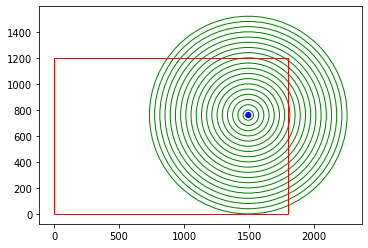

In [8]:
plt.axes()
FOV = plt.Rectangle((0,0), 1800, 1200, fc = 'None', ec = 'red', alpha =1)
apop = plt.Circle(yx_dict_edge[apop_ID], 20, fc='blue', ec = 'blue', alpha = 1)
for radial_bin in range(num_bins):
    radius = plt.Circle(yx_dict_edge[apop_ID], 800/num_bins*radial_bin, fc='None', ec = 'green', alpha = 1)
    plt.gca().add_patch(radius)
plt.gca().add_patch(FOV)
plt.gca().add_patch(apop)
plt.axis('scaled')
plt.show()

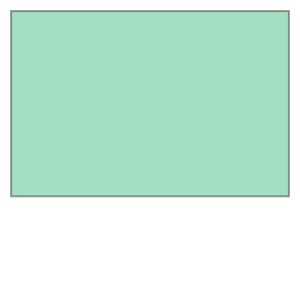

In [14]:
FOV = box(0,0,1800,1200)
FOV

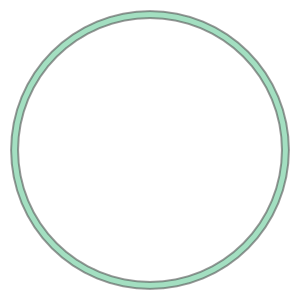

In [10]:
outer_radius = Point(yx_dict_edge[apop_ID]).buffer(800)
inner_radius = Point(yx_dict_edge[apop_ID]).buffer(760)
ring = outer_radius-inner_radius
ring

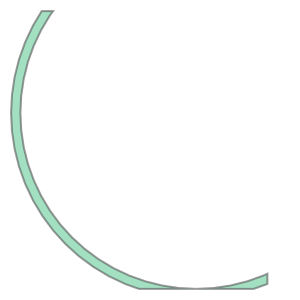

In [11]:
ring.intersection(FOV)

In [34]:
ring.intersection(FOV).area/ring.area

0.3430631743189805

# calculate percentage overlap for each bin

In [75]:
## creating 2 dicts to store occupancy fraction weights in different formats (same contents)
occupancy_fraction_dict = {}
occupancy_fraction_dict_precise = {}
## set constant params
radius = 800
num_bins = 20
FOV = box(0,0,1800,1200)
## iterate over all apop_IDs that have spatial bins overlapping the edge of the FOV
for apop_ID in yx_dict_edge: 
    ## creating a nested dictionary that contains apop_ID, bin_number and associated fraction of area of that spatial bin that is within the FOV
    occupancy_fraction_dict[apop_ID] = {}
    ## creating a nested dictionary that contains apop_ID, bin SPATIAL RANGE and associated fraction of area of that spatial bin that is within the FOV
    occupancy_fraction_dict_precise[apop_ID] = {}
    ## iterate over different radial bins calculating the intersection of the radial bin with the FOV
    for radial_bin in range(num_bins):
        outer_radius = Point(yx_dict_edge[apop_ID]).buffer((radius/num_bins)*(radial_bin+1))
        inner_radius = Point(yx_dict_edge[apop_ID]).buffer((radius/num_bins)*radial_bin)
        ring = outer_radius-inner_radius
        occupancy_fraction = ring.intersection(FOV).area/ring.area
        occupancy_fraction_dict[apop_ID][radial_bin+1] = occupancy_fraction 
        occupancy_fraction_dict_precise[apop_ID][tuple((int((radius/num_bins)*radial_bin),int((radius/num_bins)*(radial_bin+1))))] = occupancy_fraction

In [74]:
occupancy_fraction_dict_precise

{'GV0804_Pos4_179_RFP': {(0, 40): 1.0,
  (40, 80): 1.0,
  (80, 120): 1.0,
  (120, 160): 1.0,
  (160, 200): 1.0,
  (200, 240): 1.0,
  (240, 280): 1.0,
  (280, 320): 0.9797634342556419,
  (320, 360): 0.861018308203894,
  (360, 400): 0.8001077831058224,
  (400, 440): 0.7613388677789427,
  (440, 480): 0.6448123034025454,
  (480, 520): 0.5542216438090678,
  (520, 560): 0.5004690633424068,
  (560, 600): 0.4761313720346477,
  (600, 640): 0.4582455337977478,
  (640, 680): 0.4433458278515285,
  (680, 720): 0.43059922244059623,
  (720, 760): 0.4196538416877285,
  (760, 800): 0.3430631743189805},
 'GV0804_Pos4_249_RFP': {(0, 40): 1.0,
  (40, 80): 1.0,
  (80, 120): 1.0,
  (120, 160): 1.0,
  (160, 200): 0.9985213903595967,
  (200, 240): 0.8620094611996512,
  (240, 280): 0.7763949421263108,
  (280, 320): 0.729809795321848,
  (320, 360): 0.698124914855979,
  (360, 400): 0.6746850987092268,
  (400, 440): 0.6563681346663243,
  (440, 480): 0.6418208106346683,
  (480, 520): 0.5665987542950133,
  (520, 56

In [76]:
occupancy_fraction_dict

{'GV0804_Pos4_179_RFP': {1: 1.0,
  2: 1.0,
  3: 1.0,
  4: 1.0,
  5: 1.0,
  6: 1.0,
  7: 1.0,
  8: 0.9797634342556419,
  9: 0.861018308203894,
  10: 0.8001077831058224,
  11: 0.7613388677789427,
  12: 0.6448123034025454,
  13: 0.5542216438090678,
  14: 0.5004690633424068,
  15: 0.4761313720346477,
  16: 0.4582455337977478,
  17: 0.4433458278515285,
  18: 0.43059922244059623,
  19: 0.4196538416877285,
  20: 0.3430631743189805},
 'GV0804_Pos4_249_RFP': {1: 1.0,
  2: 1.0,
  3: 1.0,
  4: 1.0,
  5: 0.9985213903595967,
  6: 0.8620094611996512,
  7: 0.7763949421263108,
  8: 0.729809795321848,
  9: 0.698124914855979,
  10: 0.6746850987092268,
  11: 0.6563681346663243,
  12: 0.6418208106346683,
  13: 0.5665987542950133,
  14: 0.48967495908086844,
  15: 0.464455629419486,
  16: 0.4457967961915214,
  17: 0.430813587644107,
  18: 0.4135181479436016,
  19: 0.3281044712599048,
  20: 0.2914596804754897},
 'GV0804_Pos4_110_RFP': {1: 1.0,
  2: 1.0,
  3: 0.9390849594706389,
  4: 0.7615139111324353,
  5: 

# creating heatmaps that contain the relevant weights of each spatial bin to convolve original heatmaps resulting in weighted measurements

In [104]:
occupancy_fraction_dict[apop_ID]

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 0.9494633252493321,
 16: 0.8638085641679067,
 17: 0.7388107377968222,
 18: 0.6606426139188254,
 19: 0.6050099318297935,
 20: 0.5610097621228376}

In [114]:
empty_weightmap = np.ones((20,20))

In [15]:
apop_ID

'GV0804_Pos4_179_RFP'

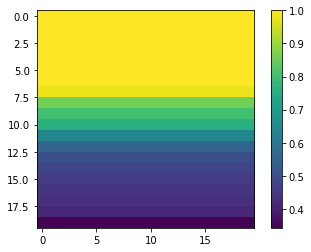

In [18]:
plt.imshow(np.load('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps/non_follow/GV0804_Pos4_179_RFP_spatial_weightmap.npy'))
plt.colorbar()

In [118]:
weightmap_path = '/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps'
for apop_ID in yx_dict_edge:
    for i in range(num_bins):
        print(i,empty_weightmap[i],occupancy_fraction_dict[apop_ID][i+1])
        weightmap[i] = empty_weightmap[i]*occupancy_fraction_dict[apop_ID][i+1]
    weightmap_fn = apop_ID + '_spatial_weightmap'
    weightmap_save_location = os.path.join(weightmap_path, weightmap_fn)
    np.save(weightmap_save_location, weightmap)

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9797634342556419
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.861018308203894
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8001077831058224
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7613388677789427
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6448123034025454
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5542216438090678
13 [1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9365576594610905
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7824268451389419
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.718167431535633
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6797903055417986
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6534920938798588
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6342080667907999
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6192881666706296
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6075041435383844
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5977711402642236
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.943288762460465
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7312978828893636
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6565813706042146
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6196410295563382
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5970619605656144
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5817881157721099
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5706772436511282
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5622021439624008
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5556089001881429
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5502838733964762
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5458849382207548
12 [1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.983990423065342
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.768920574735553
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6777014913544239
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6335516833939036
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.49007056401934646
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.434157358089951
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4046205297159657
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.38401487246859994
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.36854325594525644
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.35639192854781376
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.346652196812263
12 [1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9283039396236196
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7941786208415734
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7354771216354123
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6985215256036179
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6723288236074232
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6524580044614432
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6369708771798933
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6242832026693058
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9007063754240232
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8212260672960381
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7774364162774898
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.746177798269788
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6806354939911551
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3768022742097934
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.36954755721052773
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3631259683823979
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9390849594706391
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.761513911132435
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6921618237506528
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.653652843799127
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6284370667448418
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5689714397287634
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.47040114158038926
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1

19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.32085923260652266
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9320159482427922
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.779579790770835
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7162960078088357
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6783398747730026
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6522960387624415
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6331720128948894
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6183963726935057
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6066988863483339
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.990639491077156
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7799443880204949
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5986840648624443
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5078947990828483
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4696212440696132
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.445291587354883
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.426169564393023
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4106318731847

17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6062936460700779
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.48457950568320474
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4038665062887537
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9524259781468919
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.809343436919635
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7456779255717372
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7064608911778304
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.678897682031393
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9842851789324597
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8774554668122835
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7602832934882322
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6394480513642417
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9993510233402607
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.91343765211477
14 [1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9791516042222612
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8165028924302887
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7394095128139071
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6960329050778533
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6668703663978615
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6456046596458245
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6292573217506058
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6163619726289662
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6058586179761044
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.992530322365785
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8959672639962034
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8394804221447039


0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9215782977457034
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6973870649329053
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5690788635284314
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.497420906840696
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.46690110527378886
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.444943487293305
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.42733709526126246
13 [1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9550746820465118
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8417272053282101
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.78755969589472
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7514681813955362
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7245834491762752
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7035286895749391
13 [1. 1. 1. 1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9446580370972971
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8269601241465862
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7719478326783022
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7356403114671735
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7088981671830964
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6880176604301944
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6713242458323129
13 [1. 1

8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9261229064513308
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8327149478832919
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7858372168850897
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7530372709357148
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.728040556567516
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7080512432734777
14 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6914714661122624
15 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6776475909300604
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6009193859420693
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5271855417897309
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4911308078405577
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.473612756697

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9216448736841975
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8476526498119781
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8068339714169981

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9211057333031114
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8228124631714789
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7743250597317871
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7408558847606106
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.706561278343281
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5895100253179526
13 [1. 1. 1. 1. 1. 1. 1.

15 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5084812461017983
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.48245516452407117
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4653075171047468
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.451059522132761
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.43882850749971464
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9944338145049968
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8634121904789956
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7872860

16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5203724184592279
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4892129905990029
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4721689660787967
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4579974477486373
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9944338145049968
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8634121904789972
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7872860825809884
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.743329448

19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.31509263319463054
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9813248089719292
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8457136980854941
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7771745540321602
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7355866462702131
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7061584902199165
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6837260306593324
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.666062081

15 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3620769529752209
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3547067369991269
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3482177948597711
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.34261124801504295
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3376027915561916
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.952425978146891
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.809343436919637
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7456779255717351
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7064608911778308
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.678897682031393
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6581519782530129
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.642003138960034
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6288097771557867
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8516313685034484
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6785190935443525
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6237735155346951
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5952176291716204
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5775411915109897
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5653784634920406
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5565690186551245
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5498780892693083
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5445957765962924
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5403196187181358
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5367871404709652
12 [1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9811809247965627
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8791380286406816
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8253454323772568
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7

1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.870586282822847
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7231564041026558
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6669242884437822
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.634309347104529
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.612645400982571
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5970477162639002
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5853531014793758
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5762060986778367
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5688013821242073
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5626961898653481
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5576420922358682
13 [1. 1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9916075574774167
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8862615614749558
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8255247565574316
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7873185273659672
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9109025026493909
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8090070373046792
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7593137785306302
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7255361503452525
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7003947864090682
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6805975386722768
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.664641619763101
13 [1. 1.

9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8431965144665162
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7932252995044841
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7019434573493282
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5909025889517211
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5267078366509901
14 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4893284580704757
15 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.47005798553897493
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.45412547528609626
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.44041735491395534
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4287589437543737
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.418500447092652
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9078826122780007
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7658506743340127
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7070286853812973
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6711528964459235
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6463661418631742
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6280224047993207
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6139462010588125
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.575050767586196
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4825997361540085
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
14 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9447534881976652
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8041471456955854
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7422476817997129
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7037971003570457
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6766990251274176
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6562433809496153
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6403257183666533
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6272929374249819
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5285223800395216
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4852891102008671
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.46273388633971957
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.44450350835875674
14 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.429362721784857
15 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4165697609766192
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4054631430229696
17 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3959450773544799
18 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.38752623940337977
19 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.37997378510770774
0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8717372290912285
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7665017433885662
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7160798747066079
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6628250270934524
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5223356509913166
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4707023198553764
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4441384288613944
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.42417409685726987
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9512742318197821
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8616394028991393
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.730909556796185


0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9027807356465117
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.763198501488179
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7051973767630597
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6697249848926711
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6451902382208838
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6270005673471704
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.613056179954015
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6018673432080155
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5926744372834171
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9179888222983242
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7481638922719142
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6836308267597171
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5940205079650432
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4706502038890938
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4327582834136603
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4074916669219301
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3889126330130757
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.37449748882238754
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.36282634680357256
12 [1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8592021991916418
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7427159265902882
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6909225572560628
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6584254253537565
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6357966827645295
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6189230550658075
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6059360111156527
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5954394174744105
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5869483034172259
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.935387519315055
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8301451320079839
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7795572438428432
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7450559445497414
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7191405814322163
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6987711980219314
13 [1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9220629572855644
14 [1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7668447532820969
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6418477274116793
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5994878395305208
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5768780081428891
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5201056481695613
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4355593955575931
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4026500845393543
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3811415283345805
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3654161208145148
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3532977732522226
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3435310068995322
12 [1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.915140394719042
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7869586387728136
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7305120685511427
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6946055124935638
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6690530265146702
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6496468129491113
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6344547462898227
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6220468532202389
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9948380117877162
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8384711198188536
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7516197890224553
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7051499373462671
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6742946683234625
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6518603285759837
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6348078874673826
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6212028750306011
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6102700269303079
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.762379440856292
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5916969412665395
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5544307684904677
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5387866564599308
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5301147580552218
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5246362291243508
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5208460400282969
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5180665680245238
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5159410894334039
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5142630800193605
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5129046914460861
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.49477725905386954
12

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8449884955703963
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6258227081030171
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5739606884598386
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5525833167837885
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5408306061375406
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5333521021249874
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.528203465920638
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5244430037978857
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5215673562922516
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5192971082614908
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5174592884270609
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5159410894334032
12 

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9997295930584416
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8932370134585768
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8180881283774016
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7750780352727562
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7442486675071532
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7204555757611247
13 [1. 1. 1. 1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9156638684278964
13 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8495730472952384
14 [1. 1. 1. 1

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.9244918286478584
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7184071056926312
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5123227717060111
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4258894376249694
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.38996763939277146
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.36681980336273107
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.35042155089463783
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.33813858277860315
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.32861168951727404
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3209162902032493
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3146532319525878
12 [1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8768528927686837
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.726186343729607
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6661703377446675
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.5052751961636237
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.44421518997291926
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.4132847914051609
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.39164291864589745
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.37538904443480303
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3625454827024864
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.3522296503878171
12 [1. 1. 1. 1. 1. 1. 1. 1. 1.

0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
3 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0
5 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.8705140509272556
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7802459008243625
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7326504370359532
8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.7004503127342596
9 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6766390829399882
10 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6580956523319514
11 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6433523685677539
12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0.6310999051

# this is for only one time point, these heatmaps will work for the non-follow case but i also need to do a temporally evolving heatmap

### need to load tracking information to access xyt of each apoptotic cell

In [148]:
hdf5_file_path = []
full_xyt_dict_edge = {}
for apop_ID in tqdm(xy_dict_edge):
    expt = 'GV' +str(re.findall(r"GV(\d+)", apop_ID)[0])
    position = re.findall(r"Pos(\d+)", apop_ID)[0]

    position = 'Pos' + position

    expt_position = os.path.join(expt,position,'') ## additional '' here so that / added to end of string
    if expt_position not in hdf5_file_path:
        ## load that track data
        print('Loading', expt_position)
        hdf5_file_path = [hdf5_file_path for hdf5_file_path in hdf5_file_list if expt_position in hdf5_file_path][0]
        wt_cells, scr_cells, all_cells = tools.load_tracking_data(hdf5_file_path)
        print('Loaded', expt_position)
    
    cell_ID = int((re.findall(r"(\d+)_.FP", apop_ID))[0])
    if cell_type == 'RFP':
        cell_ID = -cell_ID
        
    focal_time = int(apop_dict[apop_ID])
    target_cell = [cell for cell in all_cells if cell.ID == cell_ID][0]
    full_xyt_dict_edge[apop_ID]={}
    for t in target_cell.t:
        full_xyt_dict_edge[apop_ID][t]= tuple(((target_cell.x[target_cell.t.index(t)]), (target_cell.y[target_cell.t.index(t)])))

#     for i in 'xyt': ## for t in target_cell.t: 
#         full_xyt_dict_edge[apop_ID][i] = {} ### full_xyt_dict_edge[apop_ID][t]={}
#     full_xyt_dict_edge[apop_ID]['x'] = target_cell.x
#     full_xyt_dict_edge[apop_ID]['y'] = target_cell.y
#     full_xyt_dict_edge[apop_ID]['t'] = target_cell.t
   


  0%|          | 0/1636 [00:00<?, ?it/s][INFO][2021/04/16 01:29:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:26 PM] Loading tracks/obj_type_1


Loading GV0804/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:28 PM] Loading objects/obj_type_1 (271439, 5) (257929 filtered: area>=100)
[INFO][2021/04/16 01:29:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:31 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:31 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:31 PM] Loading objects/obj_type_2 (42112, 5) (36481 filtered: area>=100)
[INFO][2021/04/16 01:29:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
  0%|          | 3/1636 [00:05<1:35:04,  3.49s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos4/


  1%|          | 12/1636 [00:05<46:53,  1.73s/it] [INFO][2021/04/16 01:29:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:32 PM] Loading tracks/obj_type_1


Loading GV0794/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:32 PM] Loading objects/obj_type_1 (69360, 5) (64986 filtered: area>=100)
[INFO][2021/04/16 01:29:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:33 PM] Loading objects/obj_type_2 (13865, 5) (10538 filtered: area>=100)
[INFO][2021/04/16 01:29:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
  1%|          | 14/1636 [00:07<39:31,  1.46s/it][INFO][2021/04/16 01:29:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos4/
Loading GV0794/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:34 PM] Loading objects/obj_type_1 (110774, 5) (102450 filtered: area>=100)
[INFO][2021/04/16 01:29:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:35 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:35 PM] Loading objects/obj_type_2 (20793, 5) (17016 filtered: area>=100)
[INFO][2021/04/16 01:29:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
  1%|          | 17/1636 [00:09<32:52,  1.22s/it][INFO][2021/04/16 01:29:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos7/
Loading GV0795/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:37 PM] Loading objects/obj_type_1 (211479, 5) (197642 filtered: area>=100)
[INFO][2021/04/16 01:29:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:39 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:39 PM] Loading objects/obj_type_2 (49070, 5) (38203 filtered: area>=100)
[INFO][2021/04/16 01:29:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
  2%|▏         | 28/1636 [00:13<20:31,  1.31it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos4/


  2%|▏         | 39/1636 [00:14<07:12,  3.69it/s][INFO][2021/04/16 01:29:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:41 PM] Loading tracks/obj_type_1


Loading GV0795/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:42 PM] Loading objects/obj_type_1 (199943, 5) (183929 filtered: area>=100)
[INFO][2021/04/16 01:29:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:44 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:44 PM] Loading objects/obj_type_2 (80612, 5) (63990 filtered: area>=100)
[INFO][2021/04/16 01:29:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
  3%|▎         | 49/1636 [00:18<09:32,  2.77it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos7/


  3%|▎         | 57/1636 [00:19<05:22,  4.89it/s][INFO][2021/04/16 01:29:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:45 PM] Loading tracks/obj_type_1


Loading GV0796/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:48 PM] Loading objects/obj_type_1 (441082, 5) (424178 filtered: area>=100)
[INFO][2021/04/16 01:29:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:29:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:29:53 PM] Loading objects/obj_type_2 (72743, 5) (60501 filtered: area>=100)
[INFO][2021/04/16 01:29:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
  4%|▎         | 60/1636 [00:27<26:54,  1.02s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos4/


  5%|▍         | 80/1636 [00:28<07:32,  3.44it/s][INFO][2021/04/16 01:29:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:29:55 PM] Loading tracks/obj_type_1


Loading GV0796/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:29:58 PM] Loading objects/obj_type_1 (510473, 5) (495699 filtered: area>=100)
[INFO][2021/04/16 01:30:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:04 PM] Loading objects/obj_type_2 (76238, 5) (63068 filtered: area>=100)
[INFO][2021/04/16 01:30:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
  5%|▌         | 88/1636 [00:38<21:19,  1.21it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos7/


  6%|▋         | 105/1636 [00:39<03:56,  6.48it/s][INFO][2021/04/16 01:30:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:06 PM] Loading tracks/obj_type_1


Loading GV0797/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:08 PM] Loading objects/obj_type_1 (298548, 5) (283305 filtered: area>=100)
[INFO][2021/04/16 01:30:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:11 PM] Loading objects/obj_type_2 (52032, 5) (37211 filtered: area>=100)
[INFO][2021/04/16 01:30:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
  7%|▋         | 112/1636 [00:45<17:05,  1.49it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos4/


  9%|▊         | 140/1636 [00:46<02:53,  8.64it/s][INFO][2021/04/16 01:30:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:12 PM] Loading tracks/obj_type_1


Loading GV0797/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:14 PM] Loading objects/obj_type_1 (207794, 5) (196573 filtered: area>=100)
[INFO][2021/04/16 01:30:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:16 PM] Loading objects/obj_type_2 (22939, 5) (18826 filtered: area>=100)
[INFO][2021/04/16 01:30:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
  9%|▊         | 143/1636 [00:49<10:58,  2.27it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos7/


  9%|▉         | 147/1636 [00:49<08:00,  3.10it/s][INFO][2021/04/16 01:30:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:16 PM] Loading tracks/obj_type_1


Loading GV0798/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:18 PM] Loading objects/obj_type_1 (233782, 5) (224796 filtered: area>=100)
[INFO][2021/04/16 01:30:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:20 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:20 PM] Loading objects/obj_type_2 (33185, 5) (26688 filtered: area>=100)
[INFO][2021/04/16 01:30:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
  9%|▉         | 153/1636 [00:54<10:54,  2.27it/s][INFO][2021/04/16 01:30:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:21 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos4/
Loading GV0798/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:22 PM] Loading objects/obj_type_1 (264968, 5) (250270 filtered: area>=100)
[INFO][2021/04/16 01:30:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:25 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:25 PM] Loading objects/obj_type_2 (34780, 5) (28039 filtered: area>=100)
[INFO][2021/04/16 01:30:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
 10%|▉         | 162/1636 [00:59<10:33,  2.33it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos7/


 10%|█         | 167/1636 [00:59<05:53,  4.15it/s][INFO][2021/04/16 01:30:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:26 PM] Loading tracks/obj_type_1


Loading GV0800/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:28 PM] Loading objects/obj_type_1 (293631, 5) (274724 filtered: area>=100)
[INFO][2021/04/16 01:30:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:30 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:30 PM] Loading objects/obj_type_2 (60789, 5) (49434 filtered: area>=100)
[INFO][2021/04/16 01:30:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
 10%|█         | 170/1636 [01:04<17:43,  1.38it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos4/


 11%|█         | 180/1636 [01:05<05:36,  4.32it/s][INFO][2021/04/16 01:30:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:32 PM] Loading tracks/obj_type_1


Loading GV0800/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:34 PM] Loading objects/obj_type_1 (299894, 5) (277008 filtered: area>=100)
[INFO][2021/04/16 01:30:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:36 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:37 PM] Loading objects/obj_type_2 (53124, 5) (43280 filtered: area>=100)
[INFO][2021/04/16 01:30:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
 12%|█▏        | 193/1636 [01:11<06:43,  3.58it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos7/


 12%|█▏        | 202/1636 [01:11<03:22,  7.10it/s][INFO][2021/04/16 01:30:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:38 PM] Loading tracks/obj_type_1


Loading GV0795/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:39 PM] Loading objects/obj_type_1 (142287, 5) (125195 filtered: area>=100)
[INFO][2021/04/16 01:30:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:40 PM] Loading objects/obj_type_2 (36319, 5) (29965 filtered: area>=100)
[INFO][2021/04/16 01:30:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
 13%|█▎        | 206/1636 [01:14<07:14,  3.29it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos17/


 13%|█▎        | 219/1636 [01:15<03:23,  6.95it/s][INFO][2021/04/16 01:30:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:42 PM] Loading tracks/obj_type_1


Loading GV0796/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:44 PM] Loading objects/obj_type_1 (307793, 5) (293005 filtered: area>=100)
[INFO][2021/04/16 01:30:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:47 PM] Loading objects/obj_type_2 (46439, 5) (38835 filtered: area>=100)
[INFO][2021/04/16 01:30:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
 14%|█▎        | 224/1636 [01:21<16:30,  1.43it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos21/


 15%|█▍        | 240/1636 [01:21<04:42,  4.94it/s][INFO][2021/04/16 01:30:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:48 PM] Loading tracks/obj_type_1


Loading GV0796/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:51 PM] Loading objects/obj_type_1 (388884, 5) (377860 filtered: area>=100)
[INFO][2021/04/16 01:30:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:55 PM] Loading objects/obj_type_2 (63131, 5) (54866 filtered: area>=100)
[INFO][2021/04/16 01:30:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
 15%|█▌        | 249/1636 [01:29<14:58,  1.54it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos22/


 16%|█▌        | 254/1636 [01:30<10:46,  2.14it/s][INFO][2021/04/16 01:30:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:56 PM] Loading tracks/obj_type_1


Loading GV0797/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:30:58 PM] Loading objects/obj_type_1 (193103, 5) (183703 filtered: area>=100)
[INFO][2021/04/16 01:30:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:30:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:30:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:30:59 PM] Loading objects/obj_type_2 (12311, 5) (8874 filtered: area>=100)
[INFO][2021/04/16 01:31:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
 16%|█▌        | 263/1636 [01:33<08:47,  2.61it/s][INFO][2021/04/16 01:31:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos20/
Loading GV0797/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:01 PM] Loading objects/obj_type_1 (211568, 5) (195992 filtered: area>=100)
[INFO][2021/04/16 01:31:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:03 PM] Loading objects/obj_type_2 (26227, 5) (20975 filtered: area>=100)
[INFO][2021/04/16 01:31:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
 17%|█▋        | 271/1636 [01:37<09:46,  2.33it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos21/


[INFO][2021/04/16 01:31:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:03 PM] Loading tracks/obj_type_1


Loading GV0798/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:05 PM] Loading objects/obj_type_1 (192967, 5) (184679 filtered: area>=100)
[INFO][2021/04/16 01:31:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:06 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:07 PM] Loading objects/obj_type_2 (51909, 5) (44768 filtered: area>=100)
[INFO][2021/04/16 01:31:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
 17%|█▋        | 278/1636 [01:41<11:14,  2.01it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos20/


 17%|█▋        | 286/1636 [01:41<07:58,  2.82it/s][INFO][2021/04/16 01:31:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:08 PM] Loading tracks/obj_type_1


Loading GV0798/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:10 PM] Loading objects/obj_type_1 (332657, 5) (316064 filtered: area>=100)
[INFO][2021/04/16 01:31:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:13 PM] Loading objects/obj_type_2 (59184, 5) (40538 filtered: area>=100)
[INFO][2021/04/16 01:31:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
 18%|█▊        | 289/1636 [01:47<19:16,  1.16it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos21/


 18%|█▊        | 301/1636 [01:48<04:46,  4.66it/s][INFO][2021/04/16 01:31:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:15 PM] Loading tracks/obj_type_1


Loading GV0801/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:17 PM] Loading objects/obj_type_1 (315086, 5) (299584 filtered: area>=100)
[INFO][2021/04/16 01:31:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:20 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:20 PM] Loading objects/obj_type_2 (60246, 5) (49441 filtered: area>=100)
[INFO][2021/04/16 01:31:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
 19%|█▊        | 303/1636 [01:54<22:51,  1.03s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos4/


 19%|█▉        | 312/1636 [01:55<09:32,  2.31it/s][INFO][2021/04/16 01:31:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:22 PM] Loading tracks/obj_type_1


Loading GV0802/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:24 PM] Loading objects/obj_type_1 (351066, 5) (338199 filtered: area>=100)
[INFO][2021/04/16 01:31:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:27 PM] Loading objects/obj_type_2 (32989, 5) (27879 filtered: area>=100)
[INFO][2021/04/16 01:31:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
 19%|█▉        | 317/1636 [02:02<19:59,  1.10it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos4/


 20%|█▉        | 325/1636 [02:02<09:00,  2.42it/s][INFO][2021/04/16 01:31:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:29 PM] Loading tracks/obj_type_1


Loading GV0805/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:31 PM] Loading objects/obj_type_1 (349354, 5) (331443 filtered: area>=100)
[INFO][2021/04/16 01:31:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:35 PM] Loading objects/obj_type_2 (54322, 5) (47931 filtered: area>=100)
[INFO][2021/04/16 01:31:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
 20%|█▉        | 327/1636 [02:09<27:01,  1.24s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos4/


 21%|██        | 345/1636 [02:10<09:25,  2.28it/s][INFO][2021/04/16 01:31:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:37 PM] Loading tracks/obj_type_1


Loading GV0806/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:40 PM] Loading objects/obj_type_1 (509105, 5) (489414 filtered: area>=100)
[INFO][2021/04/16 01:31:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:46 PM] Loading objects/obj_type_2 (68404, 5) (59567 filtered: area>=100)
[INFO][2021/04/16 01:31:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
 22%|██▏       | 354/1636 [02:20<25:46,  1.21s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos4/


 22%|██▏       | 366/1636 [02:21<08:32,  2.48it/s][INFO][2021/04/16 01:31:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:48 PM] Loading tracks/obj_type_1


Loading GV0807/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:50 PM] Loading objects/obj_type_1 (313526, 5) (300454 filtered: area>=100)
[INFO][2021/04/16 01:31:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:53 PM] Loading objects/obj_type_2 (38098, 5) (31521 filtered: area>=100)
[INFO][2021/04/16 01:31:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
 23%|██▎       | 369/1636 [02:27<17:40,  1.20it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos4/


 23%|██▎       | 377/1636 [02:27<09:09,  2.29it/s][INFO][2021/04/16 01:31:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:54 PM] Loading tracks/obj_type_1


Loading GV0820/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:31:55 PM] Loading objects/obj_type_1 (204895, 5) (190534 filtered: area>=100)
[INFO][2021/04/16 01:31:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:31:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:57 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:31:57 PM] Loading objects/obj_type_2 (70432, 5) (57621 filtered: area>=100)
[INFO][2021/04/16 01:31:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
 23%|██▎       | 379/1636 [02:31<18:55,  1.11it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos0/


 25%|██▍       | 401/1636 [02:33<04:29,  4.58it/s][INFO][2021/04/16 01:31:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:31:59 PM] Loading tracks/obj_type_1


Loading GV0820/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:01 PM] Loading objects/obj_type_1 (205829, 5) (191939 filtered: area>=100)
[INFO][2021/04/16 01:32:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:03 PM] Loading objects/obj_type_2 (93902, 5) (77327 filtered: area>=100)
[INFO][2021/04/16 01:32:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos1/


 26%|██▌       | 420/1636 [02:38<04:48,  4.21it/s][INFO][2021/04/16 01:32:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:05 PM] Loading tracks/obj_type_1


Loading GV0820/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:06 PM] Loading objects/obj_type_1 (187834, 5) (174544 filtered: area>=100)
[INFO][2021/04/16 01:32:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:08 PM] Loading objects/obj_type_2 (73959, 5) (62237 filtered: area>=100)
[INFO][2021/04/16 01:32:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
 26%|██▋       | 431/1636 [02:42<06:31,  3.08it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos2/


 27%|██▋       | 445/1636 [02:43<02:29,  7.99it/s][INFO][2021/04/16 01:32:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:10 PM] Loading tracks/obj_type_1


Loading GV0820/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:11 PM] Loading objects/obj_type_1 (191590, 5) (179288 filtered: area>=100)
[INFO][2021/04/16 01:32:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:13 PM] Loading objects/obj_type_2 (65619, 5) (55005 filtered: area>=100)
[INFO][2021/04/16 01:32:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos3/


 28%|██▊       | 461/1636 [02:48<05:10,  3.78it/s][INFO][2021/04/16 01:32:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:15 PM] Loading tracks/obj_type_1


Loading GV0820/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:16 PM] Loading objects/obj_type_1 (189653, 5) (175798 filtered: area>=100)
[INFO][2021/04/16 01:32:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:18 PM] Loading objects/obj_type_2 (82474, 5) (72948 filtered: area>=100)
[INFO][2021/04/16 01:32:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
 28%|██▊       | 465/1636 [02:52<10:15,  1.90it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos4/


 29%|██▉       | 480/1636 [02:53<03:22,  5.71it/s][INFO][2021/04/16 01:32:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:20 PM] Loading tracks/obj_type_1


Loading GV0820/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:21 PM] Loading objects/obj_type_1 (168718, 5) (157112 filtered: area>=100)
[INFO][2021/04/16 01:32:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:23 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:23 PM] Loading objects/obj_type_2 (75424, 5) (61898 filtered: area>=100)
[INFO][2021/04/16 01:32:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
 30%|██▉       | 486/1636 [02:57<06:22,  3.01it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos5/


 31%|███       | 502/1636 [02:59<02:38,  7.15it/s][INFO][2021/04/16 01:32:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:26 PM] Loading tracks/obj_type_1


Loading GV0796/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:26 PM] Loading objects/obj_type_1 (111905, 5) (102407 filtered: area>=100)
[INFO][2021/04/16 01:32:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:28 PM] Loading objects/obj_type_2 (125793, 5) (96319 filtered: area>=100)
[INFO][2021/04/16 01:32:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5
 31%|███       | 508/1636 [03:02<05:59,  3.14it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos5/


 33%|███▎      | 548/1636 [03:05<01:39, 10.95it/s][INFO][2021/04/16 01:32:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:32 PM] Loading tracks/obj_type_1


Loading GV0796/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:32 PM] Loading objects/obj_type_1 (70354, 5) (57413 filtered: area>=100)
[INFO][2021/04/16 01:32:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:33 PM] Loading objects/obj_type_2 (88276, 5) (68435 filtered: area>=100)
[INFO][2021/04/16 01:32:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
 34%|███▍      | 553/1636 [03:07<04:06,  4.39it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos6/


 35%|███▍      | 567/1636 [03:08<01:48,  9.89it/s][INFO][2021/04/16 01:32:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:35 PM] Loading tracks/obj_type_1


Loading GV0797/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:35 PM] Loading objects/obj_type_1 (83742, 5) (65837 filtered: area>=100)
[INFO][2021/04/16 01:32:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:36 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:36 PM] Loading objects/obj_type_2 (22517, 5) (15314 filtered: area>=100)
[INFO][2021/04/16 01:32:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
 35%|███▌      | 575/1636 [03:09<02:43,  6.49it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos5/


[INFO][2021/04/16 01:32:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:36 PM] Loading tracks/obj_type_1


Loading GV0797/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:37 PM] Loading objects/obj_type_1 (53866, 5) (44492 filtered: area>=100)
[INFO][2021/04/16 01:32:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:37 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:37 PM] Loading objects/obj_type_2 (60337, 5) (42952 filtered: area>=100)
[INFO][2021/04/16 01:32:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
 35%|███▌      | 578/1636 [03:11<04:58,  3.55it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos6/


 36%|███▋      | 594/1636 [03:12<01:55,  9.02it/s][INFO][2021/04/16 01:32:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:39 PM] Loading tracks/obj_type_1


Loading GV0798/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:39 PM] Loading objects/obj_type_1 (40829, 5) (33345 filtered: area>=100)
[INFO][2021/04/16 01:32:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:39 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:40 PM] Loading objects/obj_type_2 (62601, 5) (49976 filtered: area>=100)
[INFO][2021/04/16 01:32:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
 36%|███▋      | 597/1636 [03:13<04:05,  4.23it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos5/


 37%|███▋      | 609/1636 [03:14<02:11,  7.80it/s][INFO][2021/04/16 01:32:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:41 PM] Loading tracks/obj_type_1


Loading GV0798/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:41 PM] Loading objects/obj_type_1 (87350, 5) (79247 filtered: area>=100)
[INFO][2021/04/16 01:32:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:42 PM] Loading objects/obj_type_2 (81755, 5) (62545 filtered: area>=100)
[INFO][2021/04/16 01:32:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
 37%|███▋      | 613/1636 [03:16<04:47,  3.56it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos6/


 39%|███▊      | 632/1636 [03:17<01:32, 10.86it/s][INFO][2021/04/16 01:32:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:44 PM] Loading tracks/obj_type_1


Loading GV0800/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:44 PM] Loading objects/obj_type_1 (39998, 5) (30974 filtered: area>=100)
[INFO][2021/04/16 01:32:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:45 PM] Loading objects/obj_type_2 (56244, 5) (41825 filtered: area>=100)
[INFO][2021/04/16 01:32:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
 39%|███▉      | 639/1636 [03:19<02:28,  6.70it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos5/


 40%|███▉      | 648/1636 [03:19<01:41,  9.74it/s][INFO][2021/04/16 01:32:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:46 PM] Loading tracks/obj_type_1


Loading GV0800/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:47 PM] Loading objects/obj_type_1 (52406, 5) (44528 filtered: area>=100)
[INFO][2021/04/16 01:32:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:48 PM] Loading objects/obj_type_2 (113641, 5) (87932 filtered: area>=100)
[INFO][2021/04/16 01:32:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
 40%|████      | 658/1636 [03:22<02:47,  5.85it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos6/


 41%|████      | 670/1636 [03:23<01:22, 11.76it/s][INFO][2021/04/16 01:32:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:49 PM] Loading tracks/obj_type_1


Loading GV0801/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:50 PM] Loading objects/obj_type_1 (109693, 5) (98799 filtered: area>=100)
[INFO][2021/04/16 01:32:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:51 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:52 PM] Loading objects/obj_type_2 (172185, 5) (145089 filtered: area>=100)
[INFO][2021/04/16 01:32:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
 42%|████▏     | 684/1636 [03:27<02:25,  6.52it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos5/


 43%|████▎     | 704/1636 [03:29<01:59,  7.78it/s][INFO][2021/04/16 01:32:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:56 PM] Loading tracks/obj_type_1


Loading GV0802/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:56 PM] Loading objects/obj_type_1 (49875, 5) (41993 filtered: area>=100)
[INFO][2021/04/16 01:32:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:32:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:32:57 PM] Loading objects/obj_type_2 (87129, 5) (71072 filtered: area>=100)
[INFO][2021/04/16 01:32:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
 43%|████▎     | 708/1636 [03:31<04:25,  3.50it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos5/


 44%|████▍     | 725/1636 [03:32<01:17, 11.75it/s][INFO][2021/04/16 01:32:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:32:59 PM] Loading tracks/obj_type_1


Loading GV0804/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:32:59 PM] Loading objects/obj_type_1 (108652, 5) (92224 filtered: area>=100)
[INFO][2021/04/16 01:33:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:00 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:01 PM] Loading objects/obj_type_2 (93166, 5) (75916 filtered: area>=100)
[INFO][2021/04/16 01:33:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
 45%|████▍     | 729/1636 [03:35<05:35,  2.70it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos5/


 46%|████▌     | 752/1636 [03:36<01:25, 10.36it/s][INFO][2021/04/16 01:33:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:03 PM] Loading tracks/obj_type_1


Loading GV0805/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:03 PM] Loading objects/obj_type_1 (59442, 5) (48237 filtered: area>=100)
[INFO][2021/04/16 01:33:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:04 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:04 PM] Loading objects/obj_type_2 (110498, 5) (92236 filtered: area>=100)
[INFO][2021/04/16 01:33:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
 46%|████▋     | 759/1636 [03:39<03:16,  4.45it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos5/


 48%|████▊     | 782/1636 [03:40<01:24, 10.11it/s][INFO][2021/04/16 01:33:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:06 PM] Loading tracks/obj_type_1


Loading GV0806/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:07 PM] Loading objects/obj_type_1 (76725, 5) (65455 filtered: area>=100)
[INFO][2021/04/16 01:33:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:08 PM] Loading objects/obj_type_2 (76899, 5) (56104 filtered: area>=100)
[INFO][2021/04/16 01:33:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
 48%|████▊     | 788/1636 [03:42<03:02,  4.65it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos5/


 48%|████▊     | 791/1636 [03:42<02:18,  6.11it/s][INFO][2021/04/16 01:33:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:09 PM] Loading tracks/obj_type_1


Loading GV0807/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:10 PM] Loading objects/obj_type_1 (129954, 5) (111411 filtered: area>=100)
[INFO][2021/04/16 01:33:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:11 PM] Loading objects/obj_type_2 (87213, 5) (74295 filtered: area>=100)
[INFO][2021/04/16 01:33:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
 49%|████▉     | 803/1636 [03:46<03:36,  3.85it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos5/


 50%|█████     | 818/1636 [03:46<01:43,  7.88it/s][INFO][2021/04/16 01:33:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:13 PM] Loading tracks/obj_type_1


Loading GV0800/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:15 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2021/04/16 01:33:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:19 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2021/04/16 01:33:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
 50%|█████     | 821/1636 [03:53<10:48,  1.26it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos16/


 51%|█████▏    | 842/1636 [03:55<02:04,  6.38it/s][INFO][2021/04/16 01:33:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:22 PM] Loading tracks/obj_type_1


Loading GV0795/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:22 PM] Loading objects/obj_type_1 (41273, 5) (28239 filtered: area>=100)
[INFO][2021/04/16 01:33:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:22 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:23 PM] Loading objects/obj_type_2 (71063, 5) (58416 filtered: area>=100)
[INFO][2021/04/16 01:33:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
 52%|█████▏    | 844/1636 [03:57<04:33,  2.90it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos18/


 52%|█████▏    | 854/1636 [03:57<02:13,  5.84it/s][INFO][2021/04/16 01:33:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:24 PM] Loading tracks/obj_type_1


Loading GV0796/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:25 PM] Loading objects/obj_type_1 (95277, 5) (83305 filtered: area>=100)
[INFO][2021/04/16 01:33:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:25 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:26 PM] Loading objects/obj_type_2 (126378, 5) (98072 filtered: area>=100)
[INFO][2021/04/16 01:33:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
 53%|█████▎    | 859/1636 [04:00<05:22,  2.41it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos23/


 54%|█████▍    | 884/1636 [04:02<00:52, 14.42it/s][INFO][2021/04/16 01:33:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:28 PM] Loading tracks/obj_type_1


Loading GV0796/Pos24/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:29 PM] Loading objects/obj_type_1 (85037, 5) (73583 filtered: area>=100)
[INFO][2021/04/16 01:33:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:30 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:31 PM] Loading objects/obj_type_2 (132294, 5) (100961 filtered: area>=100)
[INFO][2021/04/16 01:33:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5
 54%|█████▍    | 891/1636 [04:05<02:48,  4.43it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos24/


 56%|█████▌    | 913/1636 [04:06<00:52, 13.85it/s][INFO][2021/04/16 01:33:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:33 PM] Loading tracks/obj_type_1


Loading GV0797/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:33 PM] Loading objects/obj_type_1 (34660, 5) (27773 filtered: area>=100)
[INFO][2021/04/16 01:33:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:34 PM] Loading objects/obj_type_2 (53322, 5) (37156 filtered: area>=100)
[INFO][2021/04/16 01:33:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
 56%|█████▌    | 918/1636 [04:08<01:47,  6.67it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos22/


[INFO][2021/04/16 01:33:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:35 PM] Loading tracks/obj_type_1
[INFO][2021/04/16 01:33:35 PM] Loading objects/obj_type_1 (23980, 5) (18959 filtered: area>=100)


Loading GV0797/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:35 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:35 PM] Loading objects/obj_type_2 (34897, 5) (24894 filtered: area>=100)
[INFO][2021/04/16 01:33:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
 57%|█████▋    | 928/1636 [04:09<01:32,  7.61it/s][INFO][2021/04/16 01:33:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos23/
Loading GV0798/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:36 PM] Loading objects/obj_type_1 (54200, 5) (44110 filtered: area>=100)
[INFO][2021/04/16 01:33:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:36 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:36 PM] Loading objects/obj_type_2 (43364, 5) (33560 filtered: area>=100)
[INFO][2021/04/16 01:33:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
 57%|█████▋    | 938/1636 [04:10<01:34,  7.36it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos22/


 58%|█████▊    | 946/1636 [04:11<01:15,  9.16it/s][INFO][2021/04/16 01:33:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:37 PM] Loading tracks/obj_type_1


Loading GV0798/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:38 PM] Loading objects/obj_type_1 (122661, 5) (114306 filtered: area>=100)
[INFO][2021/04/16 01:33:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:39 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:40 PM] Loading objects/obj_type_2 (120909, 5) (98424 filtered: area>=100)
[INFO][2021/04/16 01:33:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
 58%|█████▊    | 954/1636 [04:15<03:02,  3.74it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos23/


 60%|██████    | 986/1636 [04:17<01:30,  7.16it/s][INFO][2021/04/16 01:33:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:43 PM] Loading tracks/obj_type_1


Loading GV0800/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:44 PM] Loading objects/obj_type_1 (102414, 5) (89276 filtered: area>=100)
[INFO][2021/04/16 01:33:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:45 PM] Loading objects/obj_type_2 (83250, 5) (67284 filtered: area>=100)
[INFO][2021/04/16 01:33:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
 61%|██████    | 997/1636 [04:20<01:49,  5.81it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos17/


 61%|██████    | 1000/1636 [04:20<01:31,  6.92it/s][INFO][2021/04/16 01:33:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:47 PM] Loading tracks/obj_type_1


Loading GV0795/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:48 PM] Loading objects/obj_type_1 (274100, 5) (263837 filtered: area>=100)
[INFO][2021/04/16 01:33:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:51 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:51 PM] Loading objects/obj_type_2 (16554, 5) (13970 filtered: area>=100)
[INFO][2021/04/16 01:33:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
 62%|██████▏   | 1009/1636 [04:25<02:31,  4.14it/s][INFO][2021/04/16 01:33:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos3/
Loading GV0795/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:33:53 PM] Loading objects/obj_type_1 (273725, 5) (262060 filtered: area>=100)
[INFO][2021/04/16 01:33:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:33:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:33:56 PM] Loading objects/obj_type_2 (12522, 5) (9142 filtered: area>=100)
[INFO][2021/04/16 01:33:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
 62%|██████▏   | 1016/1636 [04:29<03:44,  2.76it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos8/


 62%|██████▏   | 1019/1636 [04:30<03:03,  3.37it/s][INFO][2021/04/16 01:33:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:33:57 PM] Loading tracks/obj_type_1


Loading GV0796/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:01 PM] Loading objects/obj_type_1 (683581, 5) (648688 filtered: area>=100)
[INFO][2021/04/16 01:34:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:08 PM] Loading objects/obj_type_2 (16040, 5) (13600 filtered: area>=100)
[INFO][2021/04/16 01:34:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos3/


 63%|██████▎   | 1029/1636 [04:42<07:03,  1.43it/s][INFO][2021/04/16 01:34:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:09 PM] Loading tracks/obj_type_1


Loading GV0796/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:11 PM] Loading objects/obj_type_1 (459180, 5) (445430 filtered: area>=100)
[INFO][2021/04/16 01:34:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:16 PM] Loading objects/obj_type_2 (10613, 5) (8656 filtered: area>=100)
[INFO][2021/04/16 01:34:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos8/


 63%|██████▎   | 1031/1636 [04:49<16:25,  1.63s/it][INFO][2021/04/16 01:34:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:16 PM] Loading tracks/obj_type_1


Loading GV0797/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:20 PM] Loading objects/obj_type_1 (449659, 5) (433455 filtered: area>=100)
[INFO][2021/04/16 01:34:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:24 PM] Loading objects/obj_type_2 (13399, 5) (10705 filtered: area>=100)
[INFO][2021/04/16 01:34:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
 63%|██████▎   | 1036/1636 [04:58<25:24,  2.54s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos3/


 64%|██████▎   | 1040/1636 [04:58<17:46,  1.79s/it][INFO][2021/04/16 01:34:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:25 PM] Loading tracks/obj_type_1


Loading GV0797/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:26 PM] Loading objects/obj_type_1 (294496, 5) (285144 filtered: area>=100)
[INFO][2021/04/16 01:34:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:29 PM] Loading objects/obj_type_2 (6854, 5) (5414 filtered: area>=100)
[INFO][2021/04/16 01:34:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1043/1636 [05:03<17:05,  1.73s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos8/


 64%|██████▍   | 1045/1636 [05:03<12:05,  1.23s/it][INFO][2021/04/16 01:34:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:30 PM] Loading tracks/obj_type_1


Loading GV0798/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:31 PM] Loading objects/obj_type_1 (286320, 5) (277358 filtered: area>=100)
[INFO][2021/04/16 01:34:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:34 PM] Loading objects/obj_type_2 (9028, 5) (8305 filtered: area>=100)
[INFO][2021/04/16 01:34:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1047/1636 [05:08<15:40,  1.60s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos8/


[INFO][2021/04/16 01:34:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:35 PM] Loading tracks/obj_type_1


Loading GV0800/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:38 PM] Loading objects/obj_type_1 (466461, 5) (444022 filtered: area>=100)
[INFO][2021/04/16 01:34:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:42 PM] Loading objects/obj_type_2 (9696, 5) (7037 filtered: area>=100)
[INFO][2021/04/16 01:34:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1049/1636 [05:15<22:06,  2.26s/it][INFO][2021/04/16 01:34:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:42 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos3/
Loading GV0800/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:45 PM] Loading objects/obj_type_1 (412266, 5) (393638 filtered: area>=100)
[INFO][2021/04/16 01:34:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:48 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:49 PM] Loading objects/obj_type_2 (16111, 5) (12664 filtered: area>=100)
[INFO][2021/04/16 01:34:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1051/1636 [05:22<25:16,  2.59s/it][INFO][2021/04/16 01:34:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:49 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos8/
Loading GV0801/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:34:52 PM] Loading objects/obj_type_1 (467654, 5) (443294 filtered: area>=100)
[INFO][2021/04/16 01:34:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:34:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:34:56 PM] Loading objects/obj_type_2 (30547, 5) (26081 filtered: area>=100)
[INFO][2021/04/16 01:34:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
 65%|██████▍   | 1060/1636 [05:30<15:24,  1.61s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos3/


 65%|██████▌   | 1064/1636 [05:30<08:12,  1.16it/s][INFO][2021/04/16 01:34:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:34:57 PM] Loading tracks/obj_type_1


Loading GV0802/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:01 PM] Loading objects/obj_type_1 (660140, 5) (631868 filtered: area>=100)
[INFO][2021/04/16 01:35:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:07 PM] Loading objects/obj_type_2 (23947, 5) (20889 filtered: area>=100)
[INFO][2021/04/16 01:35:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
 65%|██████▌   | 1066/1636 [05:41<20:25,  2.15s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos3/


 66%|██████▌   | 1072/1636 [05:41<10:28,  1.11s/it][INFO][2021/04/16 01:35:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:08 PM] Loading tracks/obj_type_1


Loading GV0805/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:11 PM] Loading objects/obj_type_1 (518517, 5) (489660 filtered: area>=100)
[INFO][2021/04/16 01:35:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:16 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:16 PM] Loading objects/obj_type_2 (16677, 5) (12311 filtered: area>=100)
[INFO][2021/04/16 01:35:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1076/1636 [05:50<13:35,  1.46s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos3/


 66%|██████▌   | 1077/1636 [05:50<09:57,  1.07s/it][INFO][2021/04/16 01:35:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:17 PM] Loading tracks/obj_type_1


Loading GV0806/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:21 PM] Loading objects/obj_type_1 (704893, 5) (675206 filtered: area>=100)
[INFO][2021/04/16 01:35:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:28 PM] Loading objects/obj_type_2 (18126, 5) (15960 filtered: area>=100)
[INFO][2021/04/16 01:35:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1078/1636 [06:02<40:02,  4.31s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos3/


 66%|██████▌   | 1081/1636 [06:02<28:06,  3.04s/it][INFO][2021/04/16 01:35:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:29 PM] Loading tracks/obj_type_1


Loading GV0807/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:32 PM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/04/16 01:35:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:36 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:36 PM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/04/16 01:35:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1083/1636 [06:09<29:09,  3.16s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos3/


 66%|██████▋   | 1087/1636 [06:10<15:16,  1.67s/it][INFO][2021/04/16 01:35:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:37 PM] Loading tracks/obj_type_1


Loading GV0813/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:37 PM] Loading objects/obj_type_1 (85389, 5) (80063 filtered: area>=100)
[INFO][2021/04/16 01:35:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:38 PM] Loading objects/obj_type_2 (20301, 5) (17076 filtered: area>=100)
[INFO][2021/04/16 01:35:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
 67%|██████▋   | 1088/1636 [06:11<14:39,  1.60s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos0/


 67%|██████▋   | 1091/1636 [06:12<10:28,  1.15s/it][INFO][2021/04/16 01:35:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:38 PM] Loading tracks/obj_type_1


Loading GV0813/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:39 PM] Loading objects/obj_type_1 (149696, 5) (120384 filtered: area>=100)
[INFO][2021/04/16 01:35:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:40 PM] Loading objects/obj_type_2 (30851, 5) (22174 filtered: area>=100)
[INFO][2021/04/16 01:35:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
 67%|██████▋   | 1097/1636 [06:14<09:30,  1.06s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos1/


 67%|██████▋   | 1102/1636 [06:15<05:00,  1.78it/s][INFO][2021/04/16 01:35:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:41 PM] Loading tracks/obj_type_1


Loading GV0813/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:42 PM] Loading objects/obj_type_1 (142719, 5) (105609 filtered: area>=100)
[INFO][2021/04/16 01:35:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:43 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:44 PM] Loading objects/obj_type_2 (22756, 5) (19093 filtered: area>=100)
[INFO][2021/04/16 01:35:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
 68%|██████▊   | 1108/1636 [06:17<04:45,  1.85it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos2/


 68%|██████▊   | 1110/1636 [06:17<03:36,  2.43it/s][INFO][2021/04/16 01:35:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:44 PM] Loading tracks/obj_type_1


Loading GV0813/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:45 PM] Loading objects/obj_type_1 (153611, 5) (136100 filtered: area>=100)
[INFO][2021/04/16 01:35:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:47 PM] Loading objects/obj_type_2 (28558, 5) (22223 filtered: area>=100)
[INFO][2021/04/16 01:35:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
 68%|██████▊   | 1112/1636 [06:20<06:25,  1.36it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos3/


 68%|██████▊   | 1116/1636 [06:21<03:31,  2.46it/s][INFO][2021/04/16 01:35:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:47 PM] Loading tracks/obj_type_1


Loading GV0813/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:49 PM] Loading objects/obj_type_1 (150938, 5) (131031 filtered: area>=100)
[INFO][2021/04/16 01:35:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:51 PM] Loading objects/obj_type_2 (39270, 5) (29540 filtered: area>=100)
[INFO][2021/04/16 01:35:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
 69%|██████▊   | 1121/1636 [06:25<04:40,  1.84it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos4/


 69%|██████▉   | 1125/1636 [06:26<02:57,  2.88it/s][INFO][2021/04/16 01:35:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:52 PM] Loading tracks/obj_type_1


Loading GV0813/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:54 PM] Loading objects/obj_type_1 (160205, 5) (133425 filtered: area>=100)
[INFO][2021/04/16 01:35:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:55 PM] Loading objects/obj_type_2 (23703, 5) (19617 filtered: area>=100)
[INFO][2021/04/16 01:35:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
 69%|██████▉   | 1129/1636 [06:29<07:16,  1.16it/s][INFO][2021/04/16 01:35:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos5/
Loading GV0814/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:35:57 PM] Loading objects/obj_type_1 (134206, 5) (118580 filtered: area>=100)
[INFO][2021/04/16 01:35:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:35:58 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:35:58 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:35:58 PM] Loading objects/obj_type_2 (41136, 5) (25703 filtered: area>=100)
[INFO][2021/04/16 01:35:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
 69%|██████▉   | 1135/1636 [06:32<05:55,  1.41it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos0/


 70%|██████▉   | 1143/1636 [06:33<02:17,  3.59it/s][INFO][2021/04/16 01:36:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:00 PM] Loading tracks/obj_type_1


Loading GV0815/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:01 PM] Loading objects/obj_type_1 (286968, 5) (261403 filtered: area>=100)
[INFO][2021/04/16 01:36:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:04 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:04 PM] Loading objects/obj_type_2 (85143, 5) (68895 filtered: area>=100)
[INFO][2021/04/16 01:36:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
 70%|██████▉   | 1145/1636 [06:38<08:14,  1.01s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos0/


 71%|███████▏  | 1169/1636 [06:41<01:31,  5.09it/s][INFO][2021/04/16 01:36:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:08 PM] Loading tracks/obj_type_1


Loading GV0816/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:08 PM] Loading objects/obj_type_1 (90368, 5) (81699 filtered: area>=100)
[INFO][2021/04/16 01:36:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:09 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:09 PM] Loading objects/obj_type_2 (24057, 5) (17173 filtered: area>=100)
[INFO][2021/04/16 01:36:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
 72%|███████▏  | 1174/1636 [06:43<01:44,  4.42it/s][INFO][2021/04/16 01:36:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos0/
Loading GV0817/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:11 PM] Loading objects/obj_type_1 (279987, 5) (256086 filtered: area>=100)
[INFO][2021/04/16 01:36:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:14 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:15 PM] Loading objects/obj_type_2 (113873, 5) (83931 filtered: area>=100)
[INFO][2021/04/16 01:36:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
 72%|███████▏  | 1183/1636 [06:49<04:03,  1.86it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos0/


 73%|███████▎  | 1201/1636 [06:50<01:02,  7.00it/s][INFO][2021/04/16 01:36:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:17 PM] Loading tracks/obj_type_1


Loading GV0819/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:19 PM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2021/04/16 01:36:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:21 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:22 PM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2021/04/16 01:36:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
 74%|███████▍  | 1209/1636 [06:56<04:42,  1.51it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos0/


 75%|███████▍  | 1219/1636 [06:57<01:58,  3.52it/s][INFO][2021/04/16 01:36:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:24 PM] Loading tracks/obj_type_1


Loading GV0819/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:26 PM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2021/04/16 01:36:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:28 PM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2021/04/16 01:36:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
 75%|███████▍  | 1223/1636 [07:02<04:02,  1.70it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos1/


 75%|███████▌  | 1231/1636 [07:03<01:44,  3.88it/s][INFO][2021/04/16 01:36:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:30 PM] Loading tracks/obj_type_1


Loading GV0819/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:31 PM] Loading objects/obj_type_1 (267623, 5) (252570 filtered: area>=100)
[INFO][2021/04/16 01:36:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:34 PM] Loading objects/obj_type_2 (113484, 5) (97628 filtered: area>=100)
[INFO][2021/04/16 01:36:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
 76%|███████▌  | 1237/1636 [07:09<04:57,  1.34it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos2/


 77%|███████▋  | 1260/1636 [07:11<00:37,  9.90it/s][INFO][2021/04/16 01:36:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:38 PM] Loading tracks/obj_type_1


Loading GV0819/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:40 PM] Loading objects/obj_type_1 (444670, 5) (426511 filtered: area>=100)
[INFO][2021/04/16 01:36:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:46 PM] Loading objects/obj_type_2 (119062, 5) (102355 filtered: area>=100)
[INFO][2021/04/16 01:36:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
 77%|███████▋  | 1265/1636 [07:20<06:02,  1.02it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos3/


 79%|███████▉  | 1294/1636 [07:22<00:43,  7.89it/s][INFO][2021/04/16 01:36:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:49 PM] Loading tracks/obj_type_1


Loading GV0819/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:36:51 PM] Loading objects/obj_type_1 (393596, 5) (379449 filtered: area>=100)
[INFO][2021/04/16 01:36:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:36:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:36:56 PM] Loading objects/obj_type_2 (112602, 5) (100064 filtered: area>=100)
[INFO][2021/04/16 01:36:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
 79%|███████▉  | 1296/1636 [07:30<07:15,  1.28s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos4/


 81%|████████  | 1323/1636 [07:32<00:46,  6.74it/s][INFO][2021/04/16 01:36:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:36:59 PM] Loading tracks/obj_type_1


Loading GV0819/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:01 PM] Loading objects/obj_type_1 (305714, 5) (290346 filtered: area>=100)
[INFO][2021/04/16 01:37:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:04 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:04 PM] Loading objects/obj_type_2 (84463, 5) (70183 filtered: area>=100)
[INFO][2021/04/16 01:37:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
 81%|████████  | 1329/1636 [07:38<02:28,  2.06it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos5/


 83%|████████▎ | 1356/1636 [07:40<00:28,  9.68it/s][INFO][2021/04/16 01:37:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:07 PM] Loading tracks/obj_type_1
[INFO][2021/04/16 01:37:07 PM] Loading objects/obj_type_1 (31315, 5) (20377 filtered: area>=100)


Loading GV0794/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:07 PM] Loading objects/obj_type_2 (61992, 5) (46754 filtered: area>=100)
[INFO][2021/04/16 01:37:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
 83%|████████▎ | 1359/1636 [07:41<01:00,  4.60it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos5/


[INFO][2021/04/16 01:37:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:08 PM] Loading tracks/obj_type_1
[INFO][2021/04/16 01:37:08 PM] Loading objects/obj_type_1 (13419, 5) (11379 filtered: area>=100)
[INFO][2021/04/16 01:37:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:08 PM] Loading tracks/obj_type_2


Loading GV0794/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:09 PM] Loading objects/obj_type_2 (69258, 5) (48810 filtered: area>=100)
[INFO][2021/04/16 01:37:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
 83%|████████▎ | 1361/1636 [07:42<01:25,  3.21it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos6/


 83%|████████▎ | 1366/1636 [07:43<01:01,  4.36it/s][INFO][2021/04/16 01:37:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:10 PM] Loading tracks/obj_type_1


Loading GV0795/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:10 PM] Loading objects/obj_type_1 (83531, 5) (74420 filtered: area>=100)
[INFO][2021/04/16 01:37:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:11 PM] Loading objects/obj_type_2 (98959, 5) (78503 filtered: area>=100)
[INFO][2021/04/16 01:37:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
 84%|████████▎ | 1368/1636 [07:45<02:17,  1.95it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos5/


 84%|████████▍ | 1373/1636 [07:46<01:11,  3.67it/s][INFO][2021/04/16 01:37:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:13 PM] Loading tracks/obj_type_1


Loading GV0795/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:13 PM] Loading objects/obj_type_1 (52858, 5) (43022 filtered: area>=100)
[INFO][2021/04/16 01:37:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:14 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:14 PM] Loading objects/obj_type_2 (95556, 5) (72517 filtered: area>=100)
[INFO][2021/04/16 01:37:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
 84%|████████▍ | 1379/1636 [07:48<01:05,  3.92it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos6/


 86%|████████▌ | 1406/1636 [07:51<00:25,  8.95it/s][INFO][2021/04/16 01:37:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:17 PM] Loading tracks/obj_type_1


Loading GV0795/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:20 PM] Loading objects/obj_type_1 (406228, 5) (386644 filtered: area>=100)
[INFO][2021/04/16 01:37:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:23 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:24 PM] Loading objects/obj_type_2 (8324, 5) (6993 filtered: area>=100)
[INFO][2021/04/16 01:37:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos16/


 86%|████████▌ | 1408/1636 [07:57<03:58,  1.05s/it][INFO][2021/04/16 01:37:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:24 PM] Loading tracks/obj_type_1


Loading GV0796/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:27 PM] Loading objects/obj_type_1 (506574, 5) (490755 filtered: area>=100)
[INFO][2021/04/16 01:37:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:32 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:32 PM] Loading objects/obj_type_2 (13897, 5) (11779 filtered: area>=100)
[INFO][2021/04/16 01:37:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
 86%|████████▌ | 1410/1636 [08:06<08:53,  2.36s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos19/


 86%|████████▋ | 1413/1636 [08:06<06:11,  1.67s/it][INFO][2021/04/16 01:37:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:33 PM] Loading tracks/obj_type_1


Loading GV0796/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:36 PM] Loading objects/obj_type_1 (469347, 5) (453478 filtered: area>=100)
[INFO][2021/04/16 01:37:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:41 PM] Loading objects/obj_type_2 (18513, 5) (14856 filtered: area>=100)
[INFO][2021/04/16 01:37:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
 86%|████████▋ | 1415/1636 [08:14<08:48,  2.39s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos20/


 87%|████████▋ | 1422/1636 [08:15<04:16,  1.20s/it][INFO][2021/04/16 01:37:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:41 PM] Loading tracks/obj_type_1


Loading GV0797/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:43 PM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2021/04/16 01:37:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:46 PM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2021/04/16 01:37:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
 87%|████████▋ | 1428/1636 [08:20<03:51,  1.11s/it][INFO][2021/04/16 01:37:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:46 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos18/
Loading GV0797/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:48 PM] Loading objects/obj_type_1 (309231, 5) (297729 filtered: area>=100)
[INFO][2021/04/16 01:37:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:51 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:51 PM] Loading objects/obj_type_2 (4035, 5) (2645 filtered: area>=100)
[INFO][2021/04/16 01:37:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
 87%|████████▋ | 1431/1636 [08:24<04:18,  1.26s/it][INFO][2021/04/16 01:37:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos19/
Loading GV0798/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:37:54 PM] Loading objects/obj_type_1 (429266, 5) (414111 filtered: area>=100)
[INFO][2021/04/16 01:37:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:37:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:37:59 PM] Loading objects/obj_type_2 (9488, 5) (7986 filtered: area>=100)
[INFO][2021/04/16 01:37:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1433/1636 [08:32<06:49,  2.02s/it][INFO][2021/04/16 01:37:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:37:59 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos18/
Loading GV0800/Pos15/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:02 PM] Loading objects/obj_type_1 (496218, 5) (476849 filtered: area>=100)
[INFO][2021/04/16 01:38:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:07 PM] Loading objects/obj_type_2 (16106, 5) (13248 filtered: area>=100)
[INFO][2021/04/16 01:38:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1437/1636 [08:40<06:13,  1.88s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos15/


 88%|████████▊ | 1440/1636 [08:41<04:25,  1.36s/it][INFO][2021/04/16 01:38:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:08 PM] Loading tracks/obj_type_1


Loading GV0814/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:10 PM] Loading objects/obj_type_1 (391111, 5) (347066 filtered: area>=100)
[INFO][2021/04/16 01:38:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:13 PM] Loading objects/obj_type_2 (26609, 5) (20891 filtered: area>=100)
[INFO][2021/04/16 01:38:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1445/1636 [08:47<06:06,  1.92s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos11/


 89%|████████▉ | 1453/1636 [08:48<02:14,  1.36it/s][INFO][2021/04/16 01:38:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:15 PM] Loading tracks/obj_type_1


Loading GV0814/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:17 PM] Loading objects/obj_type_1 (387469, 5) (361100 filtered: area>=100)
[INFO][2021/04/16 01:38:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:21 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:21 PM] Loading objects/obj_type_2 (48265, 5) (39349 filtered: area>=100)
[INFO][2021/04/16 01:38:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos12/


 89%|████████▉ | 1459/1636 [08:55<02:23,  1.24it/s][INFO][2021/04/16 01:38:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:22 PM] Loading tracks/obj_type_1


Loading GV0814/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:23 PM] Loading objects/obj_type_1 (215153, 5) (177391 filtered: area>=100)
[INFO][2021/04/16 01:38:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:25 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:25 PM] Loading objects/obj_type_2 (14323, 5) (12020 filtered: area>=100)
[INFO][2021/04/16 01:38:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
 89%|████████▉ | 1462/1636 [08:58<02:34,  1.13it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos23/


 89%|████████▉ | 1463/1636 [08:59<02:01,  1.43it/s][INFO][2021/04/16 01:38:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:25 PM] Loading tracks/obj_type_1


Loading GV0815/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:28 PM] Loading objects/obj_type_1 (383799, 5) (364840 filtered: area>=100)
[INFO][2021/04/16 01:38:31 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:31 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:31 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:32 PM] Loading objects/obj_type_2 (61591, 5) (47352 filtered: area>=100)
[INFO][2021/04/16 01:38:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
 89%|████████▉ | 1464/1636 [09:06<07:21,  2.57s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos11/


 91%|█████████ | 1482/1636 [09:07<00:47,  3.24it/s][INFO][2021/04/16 01:38:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:34 PM] Loading tracks/obj_type_1


Loading GV0815/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:35 PM] Loading objects/obj_type_1 (224299, 5) (200430 filtered: area>=100)
[INFO][2021/04/16 01:38:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:37 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:37 PM] Loading objects/obj_type_2 (51057, 5) (39432 filtered: area>=100)
[INFO][2021/04/16 01:38:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
 91%|█████████ | 1487/1636 [09:12<01:31,  1.64it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos12/


 92%|█████████▏| 1500/1636 [09:13<00:28,  4.73it/s][INFO][2021/04/16 01:38:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:39 PM] Loading tracks/obj_type_1


Loading GV0815/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:40 PM] Loading objects/obj_type_1 (182687, 5) (160127 filtered: area>=100)
[INFO][2021/04/16 01:38:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:42 PM] Loading objects/obj_type_2 (48093, 5) (41816 filtered: area>=100)
[INFO][2021/04/16 01:38:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
 92%|█████████▏| 1502/1636 [09:16<01:27,  1.52it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos23/


 92%|█████████▏| 1506/1636 [09:16<01:02,  2.09it/s][INFO][2021/04/16 01:38:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:43 PM] Loading tracks/obj_type_1


Loading GV0816/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:44 PM] Loading objects/obj_type_1 (115677, 5) (105175 filtered: area>=100)
[INFO][2021/04/16 01:38:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:44 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:45 PM] Loading objects/obj_type_2 (55169, 5) (45321 filtered: area>=100)
[INFO][2021/04/16 01:38:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
 92%|█████████▏| 1511/1636 [09:19<00:59,  2.10it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos13/


 93%|█████████▎| 1516/1636 [09:19<00:42,  2.85it/s][INFO][2021/04/16 01:38:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:46 PM] Loading tracks/obj_type_1


Loading GV0816/Pos14/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:46 PM] Loading objects/obj_type_1 (84243, 5) (76143 filtered: area>=100)
[INFO][2021/04/16 01:38:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:47 PM] Loading objects/obj_type_2 (50447, 5) (39807 filtered: area>=100)
[INFO][2021/04/16 01:38:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
 93%|█████████▎| 1518/1636 [09:21<01:02,  1.89it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos14/


 93%|█████████▎| 1522/1636 [09:21<00:38,  2.95it/s][INFO][2021/04/16 01:38:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:48 PM] Loading tracks/obj_type_1


Loading GV0816/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:49 PM] Loading objects/obj_type_1 (108996, 5) (100437 filtered: area>=100)
[INFO][2021/04/16 01:38:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:50 PM] Loading objects/obj_type_2 (36035, 5) (29738 filtered: area>=100)
[INFO][2021/04/16 01:38:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
 93%|█████████▎| 1529/1636 [09:24<01:06,  1.61it/s][INFO][2021/04/16 01:38:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos23/
Loading GV0817/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:52 PM] Loading objects/obj_type_1 (278388, 5) (263033 filtered: area>=100)
[INFO][2021/04/16 01:38:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:38:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:54 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:38:55 PM] Loading objects/obj_type_2 (103313, 5) (85256 filtered: area>=100)
[INFO][2021/04/16 01:38:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
 94%|█████████▎| 1531/1636 [09:29<02:13,  1.28s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos11/


 94%|█████████▍| 1544/1636 [09:30<00:25,  3.65it/s][INFO][2021/04/16 01:38:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:38:57 PM] Loading tracks/obj_type_1


Loading GV0817/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:38:58 PM] Loading objects/obj_type_1 (181283, 5) (167848 filtered: area>=100)
[INFO][2021/04/16 01:39:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:39:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:00 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:39:01 PM] Loading objects/obj_type_2 (111487, 5) (83279 filtered: area>=100)
[INFO][2021/04/16 01:39:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
 95%|█████████▍| 1553/1636 [09:35<00:31,  2.62it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos12/


 96%|█████████▋| 1577/1636 [09:36<00:05, 10.30it/s][INFO][2021/04/16 01:39:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:03 PM] Loading tracks/obj_type_1


Loading GV0817/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:39:06 PM] Loading objects/obj_type_1 (450270, 5) (428734 filtered: area>=100)
[INFO][2021/04/16 01:39:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:39:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:10 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:39:10 PM] Loading objects/obj_type_2 (96198, 5) (80996 filtered: area>=100)
[INFO][2021/04/16 01:39:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
 97%|█████████▋| 1580/1636 [09:44<00:48,  1.15it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos23/


 98%|█████████▊| 1603/1636 [09:46<00:05,  5.57it/s][INFO][2021/04/16 01:39:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:13 PM] Loading tracks/obj_type_1


Loading GV0818/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:39:14 PM] Loading objects/obj_type_1 (238100, 5) (221047 filtered: area>=100)
[INFO][2021/04/16 01:39:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:39:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:16 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:39:17 PM] Loading objects/obj_type_2 (70950, 5) (59685 filtered: area>=100)
[INFO][2021/04/16 01:39:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
 98%|█████████▊| 1607/1636 [09:51<00:14,  1.98it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos12/


 99%|█████████▉| 1623/1636 [09:52<00:01,  7.62it/s][INFO][2021/04/16 01:39:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:18 PM] Loading tracks/obj_type_1


Loading GV0818/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/16 01:39:21 PM] Loading objects/obj_type_1 (380641, 5) (364472 filtered: area>=100)
[INFO][2021/04/16 01:39:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/16 01:39:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/16 01:39:25 PM] Loading tracks/obj_type_2
[INFO][2021/04/16 01:39:25 PM] Loading objects/obj_type_2 (48215, 5) (40565 filtered: area>=100)
[INFO][2021/04/16 01:39:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
 99%|█████████▉| 1627/1636 [09:59<00:07,  1.15it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos13/


100%|██████████| 1636/1636 [09:59<00:00,  2.73it/s]


In [144]:
full_xyt_dict_edge[apop_ID]

{373: (877.4595947265625, 1464.663818359375),
 374: (862.3349609375, 1461.921142578125),
 375: (871.1689453125, 1454.2952880859375),
 376: (873.1480102539062, 1456.652587890625),
 377: (869.47705078125, 1453.263671875),
 378: (868.7508544921875, 1451.4071044921875),
 379: (865.0797729492188, 1453.1346435546875),
 380: (874.127685546875, 1456.0340576171875),
 381: (870.7964477539062, 1449.7237548828125),
 382: (870.4833374023438, 1448.6478271484375),
 383: (873.7024536132812, 1448.77685546875),
 384: (874.8710327148438, 1449.3662109375),
 385: (872.718994140625, 1449.328125),
 386: (872.5560302734375, 1447.4183349609375),
 387: (874.865234375, 1447.4649658203125),
 388: (874.8247680664062, 1446.1180419921875),
 389: (873.9745483398438, 1447.1514892578125),
 390: (872.1435546875, 1446.8685302734375),
 391: (872.382568359375, 1447.7938232421875),
 392: (872.6259155273438, 1447.560546875),
 393: (869.732421875, 1447.7432861328125),
 394: (870.3562622070312, 1445.8798828125),
 395: (868.948

In [137]:
full_xyt_dict_edge[apop_ID]['t'] 

{}

# how much of radial scan is outside FOV per frame per apop_ID

In [134]:
for apop_ID in full_xyt_dict_edge:
    print(apop_ID)

GV0804_Pos4_179_RFP
GV0804_Pos4_249_RFP
GV0804_Pos4_110_RFP
GV0804_Pos4_292_RFP
GV0804_Pos4_342_RFP
GV0804_Pos4_343_RFP
GV0804_Pos4_231_RFP
GV0804_Pos4_339_RFP
GV0804_Pos4_333_RFP
GV0804_Pos4_353_RFP
GV0804_Pos4_351_RFP
GV0804_Pos4_163_RFP
GV0804_Pos4_217_RFP
GV0794_Pos4_6_RFP
GV0794_Pos4_73_RFP
GV0794_Pos4_70_RFP
GV0794_Pos7_52_RFP
GV0794_Pos7_192_RFP
GV0794_Pos7_329_RFP
GV0794_Pos7_360_RFP
GV0794_Pos7_429_RFP
GV0795_Pos4_1_RFP
GV0795_Pos4_7_RFP
GV0795_Pos4_284_RFP
GV0795_Pos4_235_RFP
GV0795_Pos4_234_RFP
GV0795_Pos4_285_RFP
GV0795_Pos4_323_RFP
GV0795_Pos4_78_RFP
GV0795_Pos4_359_RFP
GV0795_Pos4_423_RFP
GV0795_Pos4_49_RFP
GV0795_Pos4_432_RFP
GV0795_Pos4_3_RFP
GV0795_Pos4_419_RFP
GV0795_Pos4_487_RFP
GV0795_Pos4_355_RFP
GV0795_Pos4_418_RFP
GV0795_Pos4_35_RFP
GV0795_Pos4_309_RFP
GV0795_Pos4_636_RFP
GV0795_Pos4_703_RFP
GV0795_Pos7_390_RFP
GV0795_Pos7_421_RFP
GV0795_Pos7_460_RFP
GV0795_Pos7_680_RFP
GV0795_Pos7_874_RFP
GV0795_Pos7_873_RFP
GV0795_Pos7_255_RFP
GV0795_Pos7_850_RFP
GV0795_Pos7_10

In [ ]:
occupancy_fraction_follow_dict={}
occupancy_fraction_follow_dict_precise={}
## set constant params
radius = 800
num_bins = 20
FOV = box(0,0,1800,1200)
## iterate over all apop_IDs that have spatial bins overlapping the edge of the FOV
for apop_ID in full_xyt_dict_edge: 
    occupancy_fraction_follow_dict[apop_ID]={}
    occupancy_fraction_follow_dict_precise[apop_ID]={}
    for frame in full_xyt_dict_edge[apop_ID]:
        print(frame)
        x,y = full_xyt_dict_edge[apop_ID][frame][0], full_xyt_dict_edge[apop_ID][frame][1]
        print(x,y)
        occupancy_fraction_follow_dict[apop_ID][frame]={}
        occupancy_fraction_follow_dict_precise[apop_ID][frame]={}
        for radial_bin in range(num_bins):
            outer_radius = Point((y,x)).buffer((radius/num_bins)*(radial_bin+1))
            inner_radius = Point((y,x)).buffer((radius/num_bins)*radial_bin)
            ring = outer_radius-inner_radius
            occupancy_fraction = ring.intersection(FOV).area/ring.area
            occupancy_fraction_follow_dict[apop_ID][frame][radial_bin+1] = occupancy_fraction 
            occupancy_fraction_follow_dict_precise[apop_ID][frame][tuple((int((radius/num_bins)*radial_bin),int((radius/num_bins)*(radial_bin+1))))] = occupancy_fraction

#             outer_radius = Point(yx_dict_edge[apop_ID]).buffer((radius/num_bins)*(radial_bin+1))
#             inner_radius = Point(yx_dict_edge[apop_ID]).buffer((radius/num_bins)*radial_bin)
#             ring = outer_radius-inner_radius
#             occupancy_fraction = ring.intersection(FOV).area/ring.area
#             occupancy_fraction_follow_dict[apop_ID][radial_bin+1] = occupancy_fraction 
#             occupancy_fraction_follow_dict_precise[apop_ID][tuple((int((radius/num_bins)*radial_bin),int((radius/num_bins)*(radial_bin+1))))] = occupancy_fraction

In [158]:
with open('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/following_spatial_occupancy.json', 'w') as fp:
    json.dump(occupancy_fraction_follow_dict, fp)

# the occupancy fraction follow dict is massive (too big) need to bin into spatial bins of 20 frames each

In [166]:
occupancy_fraction_follow_dict[apop_ID][int(apop_dict[apop_ID])]

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 0.9493807046657434,
 16: 0.8638107118949707,
 17: 0.7388364456271468,
 18: 0.6606514183400697,
 19: 0.6050149230736163,
 20: 0.5610122664177927}

In [171]:
apop_dict[apop_ID]

'981'

In [176]:
range(min(occupancy_fraction_follow_dict[apop_ID]), max(occupancy_fraction_follow_dict[apop_ID]))

range(866, 1050)

In [178]:
t_range = 800
num_bins = 20

need to find a way to take the time range of each apop_ID and bin into 40 frame bins centered on apop_time

In [186]:
1050-981

69

In [185]:
for frame in occupancy_fraction_follow_dict[apop_ID]:
    if frame >= int(apop_dict[apop_ID]):
        while frame <= int(apop_dict[apop_ID]) + 
        
    print(occupancy_fraction_follow_dict[apop_ID][frame])
    break

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 0.9377665647764778, 16: 0.8633428738193606, 17: 0.7428511009773052, 18: 0.6620098017812238, 19: 0.6057423749210677, 20: 0.5491496726617054}


or just plot the dictionary as a 20xN_frames image and bin thereafter??

In [217]:
weightmap = np.zeros((20,len(occupancy_fraction_follow_dict[apop_ID])))
for i,frame in enumerate(occupancy_fraction_follow_dict[apop_ID]):
    for j in occupancy_fraction_follow_dict[apop_ID][frame]:
        weightmap[j-1,i] = occupancy_fraction_follow_dict[apop_ID][frame][j]
        
        ### for every 40 frames, count and average and add to a new 20,20 weightmap????

# iterating and saving out all follow WMs

In [264]:
for apop_ID in tqdm(occupancy_fraction_follow_dict):
    weightmap = np.zeros((20,len(occupancy_fraction_follow_dict[apop_ID])))
    for i,frame in enumerate(occupancy_fraction_follow_dict[apop_ID]):
        for j in occupancy_fraction_follow_dict[apop_ID][frame]:
            weightmap[j-1,i] = occupancy_fraction_follow_dict[apop_ID][frame][j]
            fn = apop_ID + 'spatial_weightmap'
            save_path = os.path.join('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/spatially_binned',fn)
            np.save(save_path, weightmap)
            ### for every 40 frames, count and average and add to a new 20,20 weightmap????

100%|██████████| 1636/1636 [40:53<00:00,  1.50s/it] 


# below is a single cell weightmap showing the fraction of radial scan area inside the FOV

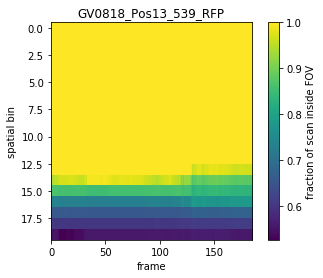

In [234]:
plt.imshow(weightmap, aspect=10)
plt.xlabel('frame')
plt.ylabel('spatial bin')
plt.title(apop_ID)
plt.colorbar(label='fraction of scan inside FOV')

# need to bin the above into 20 bins 40 frames each aligned around the apop_time 

In [262]:
from scipy import stats

# do i need to bin or can i just convolve with original unbinned counts?

In [251]:
weightmap

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.6620098 , 0.66145052, 0.6604696 , ..., 0.67730237, 0.67873223,
        0.67976364],
       [0.60574237, 0.60545467, 0.60491113, ..., 0.61338546, 0.61397595,
        0.61440758],
       [0.54914967, 0.55008957, 0.55271797, ..., 0.55826482, 0.55799562,
        0.55727825]])

In [247]:
print(weightmap[19][:])

[0.54914967 0.55008957 0.55271797 0.55399609 0.55673011 0.55180889
 0.54266456 0.5326187  0.52757509 0.52736107 0.5278812  0.53017269
 0.5283068  0.52989837 0.52975123 0.5330767  0.53373561 0.53285488
 0.53179303 0.53264713 0.5333908  0.53749012 0.54093451 0.54058216
 0.54155621 0.54181115 0.54290926 0.54358037 0.54374193 0.54571813
 0.5558947  0.55998765 0.56047733 0.559463   0.55953534 0.55948552
 0.5594899  0.55945091 0.55946134 0.55946279 0.55948316 0.55950434
 0.5594696  0.5594948  0.55957261 0.55959512 0.55961573 0.55959483
 0.55947319 0.55948726 0.55947451 0.5595609  0.55968853 0.55968085
 0.55976692 0.55989757 0.55996967 0.56001152 0.56001087 0.56001728
 0.55997153 0.5600189  0.55988181 0.55983086 0.5599009  0.55987301
 0.55993071 0.55986866 0.55992361 0.55991197 0.55991947 0.55990041
 0.55983779 0.55989063 0.55997236 0.55997556 0.56000959 0.55995422
 0.56008569 0.56000966 0.55998417 0.56001112 0.56009709 0.56014088
 0.56019735 0.56037942 0.56050286 0.56056816 0.56053379 0.5605

# better data storage method

In [ ]:
Occupancy = {‘GFP_apop_175’: {‘frame_indices’: [500, 700], ‘histogram’: np.zeros((20, 20))}}

In [8]:
occupancy = {}
for i in os.listdir('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/spatially_binned'):
    apop_ID = i.split('_spatial')[0]
    occupancy[apop_ID] = {}
    occupancy[apop_ID]['frame_indices'] = {}
    occupancy[apop_ID]['apop_time'] = {}
    occupancy[apop_ID]['spatial_occupancy_v_time_heatmap'] = {}

In [ ]:
### load tracking data
path_to_hdf5 = '/media/nathan/Transcend/Nathan/data/h2b'
hdf5_file_list = tools.hdf5_file_finder(path_to_hdf5)

In [27]:
hdf5_file_path = []
parent_dir = '/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/spatially_binned'
for i in tqdm(os.listdir('/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/spatially_binned')):
    apop_ID = i.split('_spatial')[0]
    expt = 'GV' +str(re.findall(r"GV(\d+)", apop_ID)[0])
    position = re.findall(r"Pos(\d+)", apop_ID)[0]
    position = 'Pos' + position
    expt_position = os.path.join(expt,position,'') ## additional '' here so that / added to end of string
    if expt_position not in hdf5_file_path:
        ## load that track data
        print('Loading', expt_position)
        hdf5_file_path = [hdf5_file_path for hdf5_file_path in hdf5_file_list if expt_position in hdf5_file_path][0]
        wt_cells, scr_cells, all_cells = tools.load_tracking_data(hdf5_file_path)
        print('Loaded', expt_position)
    cell_ID = int((re.findall(r"(\d+)_.FP", apop_ID))[0])
    if cell_type == 'RFP':
        cell_ID = -cell_ID    
    focal_time = int(apop_dict[apop_ID])
    target_cell = [cell for cell in all_cells if cell.ID == cell_ID][0]
    
    
    weightmap = np.load(os.path.join(parent_dir, i))
    occupancy[apop_ID]['spatial_occupancy_v_time_heatmap'] = weightmap
    occupancy[apop_ID]['apop_time'] = focal_time
    occupancy[apop_ID]['frame_indices']= tuple((target_cell.t[0], target_cell.t[-1]))


  0%|          | 0/1636 [00:00<?, ?it/s][INFO][2021/04/22 04:44:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:22 PM] Loading tracks/obj_type_1


Loading GV0804/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:24 PM] Loading objects/obj_type_1 (271439, 5) (257929 filtered: area>=100)
[INFO][2021/04/22 04:44:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:26 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:26 PM] Loading objects/obj_type_2 (42112, 5) (36481 filtered: area>=100)
[INFO][2021/04/22 04:44:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
  0%|          | 1/1636 [00:04<1:55:16,  4.23s/it][INFO][2021/04/22 04:44:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos4/
Loading GV0794/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:27 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:44:27 PM] Loading objects/obj_type_1 (69360, 5) (64986 filtered: area>=100)
[INFO][2021/04/22 04:44:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:28 PM] Loading objects/obj_type_2 (13865, 5) (10538 filtered: area>=100)
[INFO][2021/04/22 04:44:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
  1%|          | 14/1636 [00:06<1:21:09,  3.00s/it][INFO][2021/04/22 04:44:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos4/
Loading GV0794/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:29 PM] Loading objects/obj_type_1 (110774, 5) (102450 filtered: area>=100)
[INFO][2021/04/22 04:44:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:30 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:30 PM] Loading objects/obj_type_2 (20793, 5) (17016 filtered: area>=100)
[INFO][2021/04/22 04:44:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
  1%|          | 17/1636 [00:07<1:01:45,  2.29s/it][INFO][2021/04/22 04:44:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos7/
Loading GV0795/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:32 PM] Loading objects/obj_type_1 (211479, 5) (197642 filtered: area>=100)
[INFO][2021/04/22 04:44:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:34 PM] Loading objects/obj_type_2 (49070, 5) (38203 filtered: area>=100)
[INFO][2021/04/22 04:44:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
  1%|▏         | 22/1636 [00:11<49:38,  1.85s/it]  [INFO][2021/04/22 04:44:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:34 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos4/
Loading GV0795/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:36 PM] Loading objects/obj_type_1 (199943, 5) (183929 filtered: area>=100)
[INFO][2021/04/22 04:44:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:37 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:38 PM] Loading objects/obj_type_2 (80612, 5) (63990 filtered: area>=100)
[INFO][2021/04/22 04:44:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
  3%|▎         | 43/1636 [00:16<35:59,  1.36s/it][INFO][2021/04/22 04:44:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos7/
Loading GV0796/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:42 PM] Loading objects/obj_type_1 (441082, 5) (424178 filtered: area>=100)
[INFO][2021/04/22 04:44:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:46 PM] Loading objects/obj_type_2 (72743, 5) (60501 filtered: area>=100)
[INFO][2021/04/22 04:44:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
  5%|▍         | 79/1636 [00:24<19:53,  1.31it/s][INFO][2021/04/22 04:44:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos4/
Loading GV0796/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:47 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:44:50 PM] Loading objects/obj_type_1 (510473, 5) (495699 filtered: area>=100)
[INFO][2021/04/22 04:44:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:44:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:44:55 PM] Loading objects/obj_type_2 (76238, 5) (63068 filtered: area>=100)
[INFO][2021/04/22 04:44:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
  6%|▋         | 104/1636 [00:33<17:44,  1.44it/s][INFO][2021/04/22 04:44:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:44:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos7/
Loading GV0797/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:44:58 PM] Loading objects/obj_type_1 (298548, 5) (283305 filtered: area>=100)
[INFO][2021/04/22 04:45:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:01 PM] Loading objects/obj_type_2 (52032, 5) (37211 filtered: area>=100)
[INFO][2021/04/22 04:45:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
  8%|▊         | 135/1636 [00:39<12:03,  2.08it/s][INFO][2021/04/22 04:45:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos4/
Loading GV0797/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:04 PM] Loading objects/obj_type_1 (207794, 5) (196573 filtered: area>=100)
[INFO][2021/04/22 04:45:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:05 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:05 PM] Loading objects/obj_type_2 (22939, 5) (18826 filtered: area>=100)
[INFO][2021/04/22 04:45:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
  9%|▉         | 146/1636 [00:43<10:33,  2.35it/s][INFO][2021/04/22 04:45:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos7/
Loading GV0798/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:07 PM] Loading objects/obj_type_1 (233782, 5) (224796 filtered: area>=100)
[INFO][2021/04/22 04:45:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:09 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:09 PM] Loading objects/obj_type_2 (33185, 5) (26688 filtered: area>=100)
[INFO][2021/04/22 04:45:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
  9%|▉         | 154/1636 [00:47<11:09,  2.21it/s][INFO][2021/04/22 04:45:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos4/
Loading GV0798/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:11 PM] Loading objects/obj_type_1 (264968, 5) (250270 filtered: area>=100)
[INFO][2021/04/22 04:45:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:14 PM] Loading objects/obj_type_2 (34780, 5) (28039 filtered: area>=100)
[INFO][2021/04/22 04:45:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
 10%|▉         | 160/1636 [00:52<13:46,  1.79it/s][INFO][2021/04/22 04:45:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:14 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos7/
Loading GV0800/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:16 PM] Loading objects/obj_type_1 (293631, 5) (274724 filtered: area>=100)
[INFO][2021/04/22 04:45:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:19 PM] Loading objects/obj_type_2 (60789, 5) (49434 filtered: area>=100)
[INFO][2021/04/22 04:45:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
 10%|█         | 170/1636 [00:57<13:32,  1.80it/s][INFO][2021/04/22 04:45:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos4/
Loading GV0800/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:22 PM] Loading objects/obj_type_1 (299894, 5) (277008 filtered: area>=100)
[INFO][2021/04/22 04:45:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:25 PM] Loading objects/obj_type_2 (53124, 5) (43280 filtered: area>=100)
[INFO][2021/04/22 04:45:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
 11%|█▏        | 187/1636 [01:02<11:35,  2.08it/s][INFO][2021/04/22 04:45:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos7/
Loading GV0795/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:26 PM] Loading objects/obj_type_1 (142287, 5) (125195 filtered: area>=100)
[INFO][2021/04/22 04:45:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:27 PM] Loading objects/obj_type_2 (36319, 5) (29965 filtered: area>=100)
[INFO][2021/04/22 04:45:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos17/Pos17_aligned/HDF/segmented.hdf5
 13%|█▎        | 206/1636 [01:05<09:07,  2.61it/s][INFO][2021/04/22 04:45:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos17/
Loading GV0796/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:30 PM] Loading objects/obj_type_1 (307793, 5) (293005 filtered: area>=100)
[INFO][2021/04/22 04:45:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:33 PM] Loading objects/obj_type_2 (46439, 5) (38835 filtered: area>=100)
[INFO][2021/04/22 04:45:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
 15%|█▍        | 240/1636 [01:11<06:08,  3.79it/s][INFO][2021/04/22 04:45:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos21/
Loading GV0796/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:36 PM] Loading objects/obj_type_1 (388884, 5) (377860 filtered: area>=100)
[INFO][2021/04/22 04:45:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:40 PM] Loading objects/obj_type_2 (63131, 5) (54866 filtered: area>=100)
[INFO][2021/04/22 04:45:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
 15%|█▌        | 247/1636 [01:18<11:27,  2.02it/s][INFO][2021/04/22 04:45:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos22/
Loading GV0797/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:42 PM] Loading objects/obj_type_1 (193103, 5) (183703 filtered: area>=100)
[INFO][2021/04/22 04:45:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:43 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:44 PM] Loading objects/obj_type_2 (12311, 5) (8874 filtered: area>=100)
[INFO][2021/04/22 04:45:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
 16%|█▌        | 259/1636 [01:21<09:47,  2.34it/s][INFO][2021/04/22 04:45:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:44 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos20/
Loading GV0797/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:45 PM] Loading objects/obj_type_1 (211568, 5) (195992 filtered: area>=100)
[INFO][2021/04/22 04:45:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:47 PM] Loading objects/obj_type_2 (26227, 5) (20975 filtered: area>=100)
[INFO][2021/04/22 04:45:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
 16%|█▋        | 266/1636 [01:25<10:16,  2.22it/s][INFO][2021/04/22 04:45:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos21/
Loading GV0798/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:49 PM] Loading objects/obj_type_1 (192967, 5) (184679 filtered: area>=100)
[INFO][2021/04/22 04:45:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:51 PM] Loading objects/obj_type_2 (51909, 5) (44768 filtered: area>=100)
[INFO][2021/04/22 04:45:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos20/Pos20_aligned/HDF/segmented.hdf5
 17%|█▋        | 273/1636 [01:28<10:46,  2.11it/s][INFO][2021/04/22 04:45:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos20/
Loading GV0798/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:53 PM] Loading objects/obj_type_1 (332657, 5) (316064 filtered: area>=100)
[INFO][2021/04/22 04:45:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:45:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:45:57 PM] Loading objects/obj_type_2 (59184, 5) (40538 filtered: area>=100)
[INFO][2021/04/22 04:45:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
 18%|█▊        | 287/1636 [01:34<10:21,  2.17it/s][INFO][2021/04/22 04:45:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:45:57 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos21/
Loading GV0801/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:45:59 PM] Loading objects/obj_type_1 (315086, 5) (299584 filtered: area>=100)
[INFO][2021/04/22 04:46:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:02 PM] Loading objects/obj_type_2 (60246, 5) (49441 filtered: area>=100)
[INFO][2021/04/22 04:46:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
 18%|█▊        | 302/1636 [01:40<09:46,  2.28it/s][INFO][2021/04/22 04:46:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:03 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos4/
Loading GV0802/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:05 PM] Loading objects/obj_type_1 (351066, 5) (338199 filtered: area>=100)
[INFO][2021/04/22 04:46:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:08 PM] Loading objects/obj_type_2 (32989, 5) (27879 filtered: area>=100)
[INFO][2021/04/22 04:46:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
 19%|█▉        | 314/1636 [01:46<10:00,  2.20it/s][INFO][2021/04/22 04:46:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos4/
Loading GV0805/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:11 PM] Loading objects/obj_type_1 (349354, 5) (331443 filtered: area>=100)
[INFO][2021/04/22 04:46:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:14 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:15 PM] Loading objects/obj_type_2 (54322, 5) (47931 filtered: area>=100)
[INFO][2021/04/22 04:46:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
 21%|██        | 343/1636 [01:52<07:13,  2.98it/s][INFO][2021/04/22 04:46:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:15 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos4/
Loading GV0806/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:18 PM] Loading objects/obj_type_1 (509105, 5) (489414 filtered: area>=100)
[INFO][2021/04/22 04:46:23 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:23 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:23 PM] Loading objects/obj_type_2 (68404, 5) (59567 filtered: area>=100)
[INFO][2021/04/22 04:46:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
 22%|██▏       | 366/1636 [02:02<10:20,  2.05it/s][INFO][2021/04/22 04:46:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos4/
Loading GV0807/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:27 PM] Loading objects/obj_type_1 (313526, 5) (300454 filtered: area>=100)
[INFO][2021/04/22 04:46:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:30 PM] Loading objects/obj_type_2 (38098, 5) (31521 filtered: area>=100)
[INFO][2021/04/22 04:46:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
 23%|██▎       | 374/1636 [02:07<11:28,  1.83it/s][INFO][2021/04/22 04:46:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos4/
Loading GV0820/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:31 PM] Loading objects/obj_type_1 (204895, 5) (190534 filtered: area>=100)
[INFO][2021/04/22 04:46:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:33 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:33 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:33 PM] Loading objects/obj_type_2 (70432, 5) (57621 filtered: area>=100)
[INFO][2021/04/22 04:46:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
 23%|██▎       | 380/1636 [02:11<12:05,  1.73it/s][INFO][2021/04/22 04:46:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:34 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos0/
Loading GV0820/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:35 PM] Loading objects/obj_type_1 (205829, 5) (191939 filtered: area>=100)
[INFO][2021/04/22 04:46:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:37 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:38 PM] Loading objects/obj_type_2 (93902, 5) (77327 filtered: area>=100)
[INFO][2021/04/22 04:46:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
 25%|██▍       | 402/1636 [02:16<09:35,  2.14it/s][INFO][2021/04/22 04:46:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos1/
Loading GV0820/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:40 PM] Loading objects/obj_type_1 (187834, 5) (174544 filtered: area>=100)
[INFO][2021/04/22 04:46:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:41 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:42 PM] Loading objects/obj_type_2 (73959, 5) (62237 filtered: area>=100)
[INFO][2021/04/22 04:46:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
 26%|██▌       | 424/1636 [02:20<07:43,  2.61it/s][INFO][2021/04/22 04:46:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:43 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos2/
Loading GV0820/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:44 PM] Loading objects/obj_type_1 (191590, 5) (179288 filtered: area>=100)
[INFO][2021/04/22 04:46:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:46 PM] Loading objects/obj_type_2 (65619, 5) (55005 filtered: area>=100)
[INFO][2021/04/22 04:46:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
 27%|██▋       | 446/1636 [02:24<06:23,  3.10it/s][INFO][2021/04/22 04:46:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos3/
Loading GV0820/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:48 PM] Loading objects/obj_type_1 (189653, 5) (175798 filtered: area>=100)
[INFO][2021/04/22 04:46:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:49 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:50 PM] Loading objects/obj_type_2 (82474, 5) (72948 filtered: area>=100)
[INFO][2021/04/22 04:46:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
 28%|██▊       | 464/1636 [02:28<05:41,  3.43it/s][INFO][2021/04/22 04:46:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos4/
Loading GV0820/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:52 PM] Loading objects/obj_type_1 (168718, 5) (157112 filtered: area>=100)
[INFO][2021/04/22 04:46:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:54 PM] Loading objects/obj_type_2 (75424, 5) (61898 filtered: area>=100)
[INFO][2021/04/22 04:46:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
 30%|██▉       | 486/1636 [02:32<04:54,  3.91it/s][INFO][2021/04/22 04:46:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:54 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos5/
Loading GV0796/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:55 PM] Loading objects/obj_type_1 (111905, 5) (102407 filtered: area>=100)
[INFO][2021/04/22 04:46:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:57 PM] Loading objects/obj_type_2 (125793, 5) (96319 filtered: area>=100)
[INFO][2021/04/22 04:46:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos5/Pos5_aligned/HDF/segmented.hdf5
 33%|███▎      | 532/1636 [02:35<03:01,  6.07it/s][INFO][2021/04/22 04:46:58 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos5/
Loading GV0796/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:46:58 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:46:58 PM] Loading objects/obj_type_1 (70354, 5) (57413 filtered: area>=100)
[INFO][2021/04/22 04:46:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:46:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:46:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:46:59 PM] Loading objects/obj_type_2 (88276, 5) (68435 filtered: area>=100)
[INFO][2021/04/22 04:47:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
 34%|███▎      | 551/1636 [02:37<02:44,  6.58it/s][INFO][2021/04/22 04:47:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos6/
Loading GV0797/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:01 PM] Loading objects/obj_type_1 (83742, 5) (65837 filtered: area>=100)
[INFO][2021/04/22 04:47:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:01 PM] Loading objects/obj_type_2 (22517, 5) (15314 filtered: area>=100)
[INFO][2021/04/22 04:47:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
 35%|███▍      | 570/1636 [02:39<02:17,  7.74it/s][INFO][2021/04/22 04:47:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos5/
Loading GV0797/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:02 PM] Loading objects/obj_type_1 (53866, 5) (44492 filtered: area>=100)
[INFO][2021/04/22 04:47:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:03 PM] Loading objects/obj_type_2 (60337, 5) (42952 filtered: area>=100)
[INFO][2021/04/22 04:47:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos6/Pos6_aligned/HDF/segmented.hdf5
 35%|███▌      | 577/1636 [02:41<02:51,  6.16it/s][INFO][2021/04/22 04:47:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:03 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos6/
Loading GV0798/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:04 PM] Loading objects/obj_type_1 (40829, 5) (33345 filtered: area>=100)
[INFO][2021/04/22 04:47:04 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:04 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:04 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:04 PM] Loading objects/obj_type_2 (62601, 5) (49976 filtered: area>=100)
[INFO][2021/04/22 04:47:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos5/Pos5_aligned/HDF/segmented.hdf5
 36%|███▋      | 595/1636 [02:42<02:24,  7.22it/s][INFO][2021/04/22 04:47:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos5/
Loading GV0798/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:05 PM] Loading objects/obj_type_1 (87350, 5) (79247 filtered: area>=100)
[INFO][2021/04/22 04:47:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:06 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:07 PM] Loading objects/obj_type_2 (81755, 5) (62545 filtered: area>=100)
[INFO][2021/04/22 04:47:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
 37%|███▋      | 613/1636 [02:44<02:19,  7.36it/s][INFO][2021/04/22 04:47:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos6/
Loading GV0800/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:08 PM] Loading objects/obj_type_1 (39998, 5) (30974 filtered: area>=100)
[INFO][2021/04/22 04:47:08 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:08 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:08 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:08 PM] Loading objects/obj_type_2 (56244, 5) (41825 filtered: area>=100)
[INFO][2021/04/22 04:47:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
 39%|███▉      | 634/1636 [02:46<01:56,  8.63it/s][INFO][2021/04/22 04:47:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos5/
Loading GV0800/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:09 PM] Loading objects/obj_type_1 (52406, 5) (44528 filtered: area>=100)
[INFO][2021/04/22 04:47:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:09 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:10 PM] Loading objects/obj_type_2 (113641, 5) (87932 filtered: area>=100)
[INFO][2021/04/22 04:47:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
 40%|███▉      | 652/1636 [02:48<01:58,  8.32it/s][INFO][2021/04/22 04:47:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:11 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos6/
Loading GV0801/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:12 PM] Loading objects/obj_type_1 (109693, 5) (98799 filtered: area>=100)
[INFO][2021/04/22 04:47:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:14 PM] Loading objects/obj_type_2 (172185, 5) (145089 filtered: area>=100)
[INFO][2021/04/22 04:47:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
 41%|████▏     | 678/1636 [02:52<02:04,  7.71it/s][INFO][2021/04/22 04:47:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:15 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos5/
Loading GV0802/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:15 PM] Loading objects/obj_type_1 (49875, 5) (41993 filtered: area>=100)
[INFO][2021/04/22 04:47:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:16 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:16 PM] Loading objects/obj_type_2 (87129, 5) (71072 filtered: area>=100)
[INFO][2021/04/22 04:47:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
 43%|████▎     | 705/1636 [02:54<01:46,  8.76it/s][INFO][2021/04/22 04:47:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:17 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos5/
Loading GV0804/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:18 PM] Loading objects/obj_type_1 (108652, 5) (92224 filtered: area>=100)
[INFO][2021/04/22 04:47:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:19 PM] Loading objects/obj_type_2 (93166, 5) (75916 filtered: area>=100)
[INFO][2021/04/22 04:47:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
 44%|████▍     | 727/1636 [02:57<01:48,  8.34it/s][INFO][2021/04/22 04:47:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0804/Pos5/
Loading GV0805/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:20 PM] Loading objects/obj_type_1 (59442, 5) (48237 filtered: area>=100)
[INFO][2021/04/22 04:47:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:21 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:22 PM] Loading objects/obj_type_2 (110498, 5) (92236 filtered: area>=100)
[INFO][2021/04/22 04:47:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
 46%|████▌     | 755/1636 [03:00<01:38,  8.92it/s][INFO][2021/04/22 04:47:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:23 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos5/
Loading GV0806/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:23 PM] Loading objects/obj_type_1 (76725, 5) (65455 filtered: area>=100)
[INFO][2021/04/22 04:47:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:24 PM] Loading objects/obj_type_2 (76899, 5) (56104 filtered: area>=100)
[INFO][2021/04/22 04:47:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
 48%|████▊     | 785/1636 [03:02<01:25,  9.94it/s][INFO][2021/04/22 04:47:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos5/
Loading GV0807/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:26 PM] Loading objects/obj_type_1 (129954, 5) (111411 filtered: area>=100)
[INFO][2021/04/22 04:47:27 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:27 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:27 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:27 PM] Loading objects/obj_type_2 (87213, 5) (74295 filtered: area>=100)
[INFO][2021/04/22 04:47:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
 49%|████▊     | 795/1636 [03:05<02:18,  6.08it/s][INFO][2021/04/22 04:47:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos5/
Loading GV0800/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:30 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2021/04/22 04:47:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:34 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2021/04/22 04:47:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
 51%|█████▏    | 839/1636 [03:12<01:55,  6.90it/s][INFO][2021/04/22 04:47:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos16/
Loading GV0795/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:36 PM] Loading objects/obj_type_1 (41273, 5) (28239 filtered: area>=100)
[INFO][2021/04/22 04:47:36 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:36 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:36 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:36 PM] Loading objects/obj_type_2 (71063, 5) (58416 filtered: area>=100)
[INFO][2021/04/22 04:47:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
 52%|█████▏    | 846/1636 [03:14<02:14,  5.88it/s][INFO][2021/04/22 04:47:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:37 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos18/
Loading GV0796/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:37 PM] Loading objects/obj_type_1 (95277, 5) (83305 filtered: area>=100)
[INFO][2021/04/22 04:47:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:39 PM] Loading objects/obj_type_2 (126378, 5) (98072 filtered: area>=100)
[INFO][2021/04/22 04:47:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos23/Pos23_aligned/HDF/segmented.hdf5
 54%|█████▍    | 884/1636 [03:17<01:52,  6.70it/s][INFO][2021/04/22 04:47:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos23/
Loading GV0796/Pos24/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:41 PM] Loading objects/obj_type_1 (85037, 5) (73583 filtered: area>=100)
[INFO][2021/04/22 04:47:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:41 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:42 PM] Loading objects/obj_type_2 (132294, 5) (100961 filtered: area>=100)
[INFO][2021/04/22 04:47:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos24/Pos24_aligned/HDF/segmented.hdf5
 55%|█████▍    | 895/1636 [03:20<02:19,  5.30it/s][INFO][2021/04/22 04:47:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:43 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos24/
Loading GV0797/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:43 PM] Loading objects/obj_type_1 (34660, 5) (27773 filtered: area>=100)
[INFO][2021/04/22 04:47:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:44 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:44 PM] Loading objects/obj_type_2 (53322, 5) (37156 filtered: area>=100)
[INFO][2021/04/22 04:47:44 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
 56%|█████▌    | 916/1636 [03:22<01:49,  6.55it/s][INFO][2021/04/22 04:47:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:45 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos22/
Loading GV0797/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:45 PM] Loading objects/obj_type_1 (23980, 5) (18959 filtered: area>=100)
[INFO][2021/04/22 04:47:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:45 PM] Loading objects/obj_type_2 (34897, 5) (24894 filtered: area>=100)
[INFO][2021/04/22 04:47:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
 57%|█████▋    | 928/1636 [03:23<01:30,  7.78it/s][INFO][2021/04/22 04:47:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:45 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos23/
Loading GV0798/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:46 PM] Loading objects/obj_type_1 (54200, 5) (44110 filtered: area>=100)
[INFO][2021/04/22 04:47:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:46 PM] Loading objects/obj_type_2 (43364, 5) (33560 filtered: area>=100)
[INFO][2021/04/22 04:47:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
 57%|█████▋    | 938/1636 [03:24<01:31,  7.62it/s][INFO][2021/04/22 04:47:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos22/
Loading GV0798/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:48 PM] Loading objects/obj_type_1 (122661, 5) (114306 filtered: area>=100)
[INFO][2021/04/22 04:47:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:49 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:49 PM] Loading objects/obj_type_2 (120909, 5) (98424 filtered: area>=100)
[INFO][2021/04/22 04:47:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
 60%|█████▉    | 977/1636 [03:28<01:25,  7.75it/s][INFO][2021/04/22 04:47:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos23/
Loading GV0800/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:51 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:47:51 PM] Loading objects/obj_type_1 (102414, 5) (89276 filtered: area>=100)
[INFO][2021/04/22 04:47:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:52 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:52 PM] Loading objects/obj_type_2 (83250, 5) (67284 filtered: area>=100)
[INFO][2021/04/22 04:47:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
 61%|██████    | 992/1636 [03:31<01:34,  6.83it/s][INFO][2021/04/22 04:47:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:53 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos17/
Loading GV0795/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:47:55 PM] Loading objects/obj_type_1 (274100, 5) (263837 filtered: area>=100)
[INFO][2021/04/22 04:47:57 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:47:57 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:57 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:47:58 PM] Loading objects/obj_type_2 (16554, 5) (13970 filtered: area>=100)
[INFO][2021/04/22 04:47:58 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
 62%|██████▏   | 1007/1636 [03:35<02:04,  5.07it/s][INFO][2021/04/22 04:47:58 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:47:58 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos3/
Loading GV0795/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:00 PM] Loading objects/obj_type_1 (273725, 5) (262060 filtered: area>=100)
[INFO][2021/04/22 04:48:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:02 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:02 PM] Loading objects/obj_type_2 (12522, 5) (9142 filtered: area>=100)
[INFO][2021/04/22 04:48:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos8/Pos8_aligned/HDF/segmented.hdf5
 62%|██████▏   | 1013/1636 [03:40<03:49,  2.72it/s][INFO][2021/04/22 04:48:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:03 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos8/
Loading GV0796/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:07 PM] Loading objects/obj_type_1 (683581, 5) (648688 filtered: area>=100)
[INFO][2021/04/22 04:48:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:14 PM] Loading objects/obj_type_2 (16040, 5) (13600 filtered: area>=100)
[INFO][2021/04/22 04:48:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
 62%|██████▏   | 1020/1636 [03:51<07:32,  1.36it/s][INFO][2021/04/22 04:48:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:14 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos3/
Loading GV0796/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:17 PM] Loading objects/obj_type_1 (459180, 5) (445430 filtered: area>=100)
[INFO][2021/04/22 04:48:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:21 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:21 PM] Loading objects/obj_type_2 (10613, 5) (8656 filtered: area>=100)
[INFO][2021/04/22 04:48:21 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded

 63%|██████▎   | 1030/1636 [03:59<07:34,  1.33it/s][INFO][2021/04/22 04:48:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:22 PM] Loading tracks/obj_type_1


 GV0796/Pos8/
Loading GV0797/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:24 PM] Loading objects/obj_type_1 (449659, 5) (433455 filtered: area>=100)
[INFO][2021/04/22 04:48:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:29 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:29 PM] Loading objects/obj_type_2 (13399, 5) (10705 filtered: area>=100)
[INFO][2021/04/22 04:48:29 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos3/Pos3_aligned/HDF/segmented.hdf5
 63%|██████▎   | 1032/1636 [04:06<16:21,  1.63s/it][INFO][2021/04/22 04:48:29 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:29 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos3/
Loading GV0797/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:31 PM] Loading objects/obj_type_1 (294496, 5) (285144 filtered: area>=100)
[INFO][2021/04/22 04:48:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:34 PM] Loading objects/obj_type_2 (6854, 5) (5414 filtered: area>=100)
[INFO][2021/04/22 04:48:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1043/1636 [04:11<12:37,  1.28s/it][INFO][2021/04/22 04:48:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:34 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos8/
Loading GV0798/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:36 PM] Loading objects/obj_type_1 (286320, 5) (277358 filtered: area>=100)
[INFO][2021/04/22 04:48:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:38 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:38 PM] Loading objects/obj_type_2 (9028, 5) (8305 filtered: area>=100)
[INFO][2021/04/22 04:48:38 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1046/1636 [04:16<13:09,  1.34s/it][INFO][2021/04/22 04:48:38 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:38 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos8/
Loading GV0800/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:41 PM] Loading objects/obj_type_1 (466461, 5) (444022 filtered: area>=100)
[INFO][2021/04/22 04:48:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:46 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:46 PM] Loading objects/obj_type_2 (9696, 5) (7037 filtered: area>=100)
[INFO][2021/04/22 04:48:46 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1049/1636 [04:23<16:21,  1.67s/it][INFO][2021/04/22 04:48:46 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:46 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos3/
Loading GV0800/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:48 PM] Loading objects/obj_type_1 (412266, 5) (393638 filtered: area>=100)
[INFO][2021/04/22 04:48:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:48:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:52 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:48:53 PM] Loading objects/obj_type_2 (16111, 5) (12664 filtered: area>=100)
[INFO][2021/04/22 04:48:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
 64%|██████▍   | 1051/1636 [04:30<21:40,  2.22s/it][INFO][2021/04/22 04:48:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:48:53 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos8/
Loading GV0801/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:48:56 PM] Loading objects/obj_type_1 (467654, 5) (443294 filtered: area>=100)
[INFO][2021/04/22 04:49:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:00 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:00 PM] Loading objects/obj_type_2 (30547, 5) (26081 filtered: area>=100)
[INFO][2021/04/22 04:49:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
 65%|██████▍   | 1056/1636 [04:38<19:36,  2.03s/it][INFO][2021/04/22 04:49:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0801/Pos3/
Loading GV0802/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:01 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:49:05 PM] Loading objects/obj_type_1 (660140, 5) (631868 filtered: area>=100)
[INFO][2021/04/22 04:49:11 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:11 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:11 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:12 PM] Loading objects/obj_type_2 (23947, 5) (20889 filtered: area>=100)
[INFO][2021/04/22 04:49:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
 65%|██████▌   | 1066/1636 [04:49<16:40,  1.75s/it][INFO][2021/04/22 04:49:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0802/Pos3/
Loading GV0805/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:12 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:49:15 PM] Loading objects/obj_type_1 (518517, 5) (489660 filtered: area>=100)
[INFO][2021/04/22 04:49:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:20 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:20 PM] Loading objects/obj_type_2 (16677, 5) (12311 filtered: area>=100)
[INFO][2021/04/22 04:49:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1074/1636 [04:58<14:35,  1.56s/it][INFO][2021/04/22 04:49:21 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:21 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0805/Pos3/
Loading GV0806/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:25 PM] Loading objects/obj_type_1 (704893, 5) (675206 filtered: area>=100)
[INFO][2021/04/22 04:49:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:32 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:32 PM] Loading objects/obj_type_2 (18126, 5) (15960 filtered: area>=100)
[INFO][2021/04/22 04:49:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1078/1636 [05:10<18:19,  1.97s/it][INFO][2021/04/22 04:49:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0806/Pos3/
Loading GV0807/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:35 PM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/04/22 04:49:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:39 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:39 PM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/04/22 04:49:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
 66%|██████▌   | 1083/1636 [05:17<16:35,  1.80s/it][INFO][2021/04/22 04:49:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0807/Pos3/
Loading GV0813/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:40 PM] Loading objects/obj_type_1 (85389, 5) (80063 filtered: area>=100)
[INFO][2021/04/22 04:49:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:41 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:41 PM] Loading objects/obj_type_2 (20301, 5) (17076 filtered: area>=100)
[INFO][2021/04/22 04:49:41 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
 67%|██████▋   | 1088/1636 [05:18<12:20,  1.35s/it][INFO][2021/04/22 04:49:41 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos0/
Loading GV0813/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:42 PM] Loading objects/obj_type_1 (149696, 5) (120384 filtered: area>=100)
[INFO][2021/04/22 04:49:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:43 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:43 PM] Loading objects/obj_type_2 (30851, 5) (22174 filtered: area>=100)
[INFO][2021/04/22 04:49:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
 67%|██████▋   | 1092/1636 [05:21<10:11,  1.12s/it][INFO][2021/04/22 04:49:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:43 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos1/
Loading GV0813/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:44 PM] Loading objects/obj_type_1 (142719, 5) (105609 filtered: area>=100)
[INFO][2021/04/22 04:49:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:45 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:45 PM] Loading objects/obj_type_2 (22756, 5) (19093 filtered: area>=100)
[INFO][2021/04/22 04:49:45 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
 67%|██████▋   | 1104/1636 [05:23<07:27,  1.19it/s][INFO][2021/04/22 04:49:45 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:45 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos2/
Loading GV0813/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:47 PM] Loading objects/obj_type_1 (153611, 5) (136100 filtered: area>=100)
[INFO][2021/04/22 04:49:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:48 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:48 PM] Loading objects/obj_type_2 (28558, 5) (22223 filtered: area>=100)
[INFO][2021/04/22 04:49:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
 68%|██████▊   | 1111/1636 [05:25<06:09,  1.42it/s][INFO][2021/04/22 04:49:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos3/
Loading GV0813/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:49 PM] Loading objects/obj_type_1 (150938, 5) (131031 filtered: area>=100)
[INFO][2021/04/22 04:49:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:51 PM] Loading objects/obj_type_2 (39270, 5) (29540 filtered: area>=100)
[INFO][2021/04/22 04:49:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
 69%|██████▊   | 1121/1636 [05:28<04:57,  1.73it/s][INFO][2021/04/22 04:49:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos4/
Loading GV0813/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:52 PM] Loading objects/obj_type_1 (160205, 5) (133425 filtered: area>=100)
[INFO][2021/04/22 04:49:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:53 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:53 PM] Loading objects/obj_type_2 (23703, 5) (19617 filtered: area>=100)
[INFO][2021/04/22 04:49:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0813/Pos5/Pos5_aligned/HDF/segmented.hdf5
 69%|██████▉   | 1126/1636 [05:31<04:50,  1.75it/s][INFO][2021/04/22 04:49:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:54 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0813/Pos5/
Loading GV0814/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:55 PM] Loading objects/obj_type_1 (134206, 5) (118580 filtered: area>=100)
[INFO][2021/04/22 04:49:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:49:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:56 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:49:56 PM] Loading objects/obj_type_2 (41136, 5) (25703 filtered: area>=100)
[INFO][2021/04/22 04:49:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
 69%|██████▉   | 1130/1636 [05:33<04:53,  1.72it/s][INFO][2021/04/22 04:49:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:49:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos0/
Loading GV0815/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:49:58 PM] Loading objects/obj_type_1 (286968, 5) (261403 filtered: area>=100)
[INFO][2021/04/22 04:50:00 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:00 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:00 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:01 PM] Loading objects/obj_type_2 (85143, 5) (68895 filtered: area>=100)
[INFO][2021/04/22 04:50:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
 71%|███████▏  | 1167/1636 [05:39<02:51,  2.74it/s][INFO][2021/04/22 04:50:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos0/
Loading GV0816/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:02 PM] Loading objects/obj_type_1 (90368, 5) (81699 filtered: area>=100)
[INFO][2021/04/22 04:50:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:03 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:03 PM] Loading objects/obj_type_2 (24057, 5) (17173 filtered: area>=100)
[INFO][2021/04/22 04:50:03 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
 72%|███████▏  | 1174/1636 [05:40<02:29,  3.09it/s][INFO][2021/04/22 04:50:03 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:03 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos0/
Loading GV0817/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:05 PM] Loading objects/obj_type_1 (279987, 5) (256086 filtered: area>=100)
[INFO][2021/04/22 04:50:07 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:07 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:07 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:08 PM] Loading objects/obj_type_2 (113873, 5) (83931 filtered: area>=100)
[INFO][2021/04/22 04:50:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
 73%|███████▎  | 1198/1636 [05:46<02:55,  2.50it/s][INFO][2021/04/22 04:50:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:09 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos0/
Loading GV0819/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:11 PM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2021/04/22 04:50:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:13 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:14 PM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2021/04/22 04:50:14 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
 74%|███████▎  | 1206/1636 [05:52<03:26,  2.08it/s][INFO][2021/04/22 04:50:14 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:14 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos0/
Loading GV0819/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:16 PM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2021/04/22 04:50:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:19 PM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2021/04/22 04:50:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
 75%|███████▍  | 1223/1636 [05:57<02:56,  2.34it/s][INFO][2021/04/22 04:50:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos1/
Loading GV0819/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:21 PM] Loading objects/obj_type_1 (267623, 5) (252570 filtered: area>=100)
[INFO][2021/04/22 04:50:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:24 PM] Loading objects/obj_type_2 (113484, 5) (97628 filtered: area>=100)
[INFO][2021/04/22 04:50:25 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
 77%|███████▋  | 1255/1636 [06:02<02:04,  3.06it/s][INFO][2021/04/22 04:50:25 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos2/
Loading GV0819/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:28 PM] Loading objects/obj_type_1 (444670, 5) (426511 filtered: area>=100)
[INFO][2021/04/22 04:50:32 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:32 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:32 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:33 PM] Loading objects/obj_type_2 (119062, 5) (102355 filtered: area>=100)
[INFO][2021/04/22 04:50:33 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
 78%|███████▊  | 1280/1636 [06:11<02:08,  2.77it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos3/


[INFO][2021/04/22 04:50:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:34 PM] Loading tracks/obj_type_1


Loading GV0819/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:36 PM] Loading objects/obj_type_1 (393596, 5) (379449 filtered: area>=100)
[INFO][2021/04/22 04:50:40 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:40 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:40 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:41 PM] Loading objects/obj_type_2 (112602, 5) (100064 filtered: area>=100)
[INFO][2021/04/22 04:50:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
 80%|████████  | 1314/1636 [06:19<01:34,  3.41it/s][INFO][2021/04/22 04:50:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:42 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos4/
Loading GV0819/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:44 PM] Loading objects/obj_type_1 (305714, 5) (290346 filtered: area>=100)
[INFO][2021/04/22 04:50:47 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:47 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:47 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:47 PM] Loading objects/obj_type_2 (84463, 5) (70183 filtered: area>=100)
[INFO][2021/04/22 04:50:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
 82%|████████▏ | 1348/1636 [06:25<01:11,  4.04it/s][INFO][2021/04/22 04:50:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos5/
Loading GV0794/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:48 PM] Loading objects/obj_type_1 (31315, 5) (20377 filtered: area>=100)
[INFO][2021/04/22 04:50:48 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:48 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:48 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:49 PM] Loading objects/obj_type_2 (61992, 5) (46754 filtered: area>=100)
[INFO][2021/04/22 04:50:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
 83%|████████▎ | 1360/1636 [06:27<00:58,  4.72it/s][INFO][2021/04/22 04:50:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:50 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:50:50 PM] Loading objects/obj_type_1 (13419, 5) (11379 filtered: area>=100)


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos5/
Loading GV0794/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:50 PM] Loading objects/obj_type_2 (69258, 5) (48810 filtered: area>=100)
[INFO][2021/04/22 04:50:51 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0794/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:51 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0794/Pos6/
Loading GV0795/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:51 PM] Loading objects/obj_type_1 (83531, 5) (74420 filtered: area>=100)
[INFO][2021/04/22 04:50:52 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:52 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:52 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:52 PM] Loading objects/obj_type_2 (98959, 5) (78503 filtered: area>=100)
[INFO][2021/04/22 04:50:53 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
 84%|████████▎ | 1369/1636 [06:30<01:11,  3.72it/s][INFO][2021/04/22 04:50:53 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:53 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos5/
Loading GV0795/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:54 PM] Loading objects/obj_type_1 (52858, 5) (43022 filtered: area>=100)
[INFO][2021/04/22 04:50:54 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:50:54 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:54 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:50:55 PM] Loading objects/obj_type_2 (95556, 5) (72517 filtered: area>=100)
[INFO][2021/04/22 04:50:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos6/Pos6_aligned/HDF/segmented.hdf5
 84%|████████▍ | 1377/1636 [06:33<01:10,  3.69it/s][INFO][2021/04/22 04:50:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:50:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos6/
Loading GV0795/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:50:58 PM] Loading objects/obj_type_1 (406228, 5) (386644 filtered: area>=100)
[INFO][2021/04/22 04:51:01 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:01 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:01 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:01 PM] Loading objects/obj_type_2 (8324, 5) (6993 filtered: area>=100)
[INFO][2021/04/22 04:51:02 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0795/Pos16/Pos16_aligned/HDF/segmented.hdf5
 86%|████████▌ | 1407/1636 [06:39<00:57,  3.97it/s][INFO][2021/04/22 04:51:02 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos16/
Loading GV0796/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:05 PM] Loading objects/obj_type_1 (506574, 5) (490755 filtered: area>=100)
[INFO][2021/04/22 04:51:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:10 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:10 PM] Loading objects/obj_type_2 (13897, 5) (11779 filtered: area>=100)
[INFO][2021/04/22 04:51:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
 86%|████████▌ | 1411/1636 [06:47<03:00,  1.24it/s][INFO][2021/04/22 04:51:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos19/
Loading GV0796/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:10 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:51:13 PM] Loading objects/obj_type_1 (469347, 5) (453478 filtered: area>=100)
[INFO][2021/04/22 04:51:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:18 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:18 PM] Loading objects/obj_type_2 (18513, 5) (14856 filtered: area>=100)
[INFO][2021/04/22 04:51:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
 86%|████████▋ | 1415/1636 [06:55<04:17,  1.17s/it][INFO][2021/04/22 04:51:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:18 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0796/Pos20/
Loading GV0797/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:20 PM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2021/04/22 04:51:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:22 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:22 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:22 PM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2021/04/22 04:51:22 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
 87%|████████▋ | 1424/1636 [07:00<03:26,  1.03it/s][INFO][2021/04/22 04:51:23 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:23 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos18/
Loading GV0797/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:25 PM] Loading objects/obj_type_1 (309231, 5) (297729 filtered: area>=100)
[INFO][2021/04/22 04:51:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:28 PM] Loading objects/obj_type_2 (4035, 5) (2645 filtered: area>=100)
[INFO][2021/04/22 04:51:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
 87%|████████▋ | 1431/1636 [07:05<03:05,  1.11it/s][INFO][2021/04/22 04:51:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos19/
Loading GV0798/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:31 PM] Loading objects/obj_type_1 (429266, 5) (414111 filtered: area>=100)
[INFO][2021/04/22 04:51:34 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:34 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:34 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:34 PM] Loading objects/obj_type_2 (9488, 5) (7986 filtered: area>=100)
[INFO][2021/04/22 04:51:35 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1433/1636 [07:12<05:36,  1.66s/it][INFO][2021/04/22 04:51:35 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos18/
Loading GV0800/Pos15/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:38 PM] Loading objects/obj_type_1 (496218, 5) (476849 filtered: area>=100)
[INFO][2021/04/22 04:51:42 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:42 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:42 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:42 PM] Loading objects/obj_type_2 (16106, 5) (13248 filtered: area>=100)
[INFO][2021/04/22 04:51:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1435/1636 [07:20<08:07,  2.42s/it][INFO][2021/04/22 04:51:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos15/
Loading GV0814/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:43 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:51:46 PM] Loading objects/obj_type_1 (391111, 5) (347066 filtered: area>=100)
[INFO][2021/04/22 04:51:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:49 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:49 PM] Loading objects/obj_type_2 (26609, 5) (20891 filtered: area>=100)
[INFO][2021/04/22 04:51:49 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
 88%|████████▊ | 1441/1636 [07:27<06:32,  2.01s/it][INFO][2021/04/22 04:51:49 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:49 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos11/
Loading GV0814/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:52 PM] Loading objects/obj_type_1 (387469, 5) (361100 filtered: area>=100)
[INFO][2021/04/22 04:51:55 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:55 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:55 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:56 PM] Loading objects/obj_type_2 (48265, 5) (39349 filtered: area>=100)
[INFO][2021/04/22 04:51:56 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
 89%|████████▉ | 1454/1636 [07:33<04:43,  1.56s/it][INFO][2021/04/22 04:51:56 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:56 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos12/
Loading GV0814/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:51:57 PM] Loading objects/obj_type_1 (215153, 5) (177391 filtered: area>=100)
[INFO][2021/04/22 04:51:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:51:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:59 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:51:59 PM] Loading objects/obj_type_2 (14323, 5) (12020 filtered: area>=100)
[INFO][2021/04/22 04:51:59 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0814/Pos23/Pos23_aligned/HDF/segmented.hdf5
 89%|████████▉ | 1462/1636 [07:37<03:31,  1.22s/it][INFO][2021/04/22 04:51:59 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:51:59 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0814/Pos23/
Loading GV0815/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:02 PM] Loading objects/obj_type_1 (383799, 5) (364840 filtered: area>=100)
[INFO][2021/04/22 04:52:05 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:05 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:05 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:05 PM] Loading objects/obj_type_2 (61591, 5) (47352 filtered: area>=100)
[INFO][2021/04/22 04:52:06 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
 89%|████████▉ | 1464/1636 [07:43<05:10,  1.81s/it][INFO][2021/04/22 04:52:06 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:06 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos11/
Loading GV0815/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:07 PM] Loading objects/obj_type_1 (224299, 5) (200430 filtered: area>=100)
[INFO][2021/04/22 04:52:09 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:09 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:09 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:09 PM] Loading objects/obj_type_2 (51057, 5) (39432 filtered: area>=100)
[INFO][2021/04/22 04:52:10 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
 91%|█████████ | 1483/1636 [07:47<03:23,  1.33s/it][INFO][2021/04/22 04:52:10 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:10 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos12/
Loading GV0815/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:11 PM] Loading objects/obj_type_1 (182687, 5) (160127 filtered: area>=100)
[INFO][2021/04/22 04:52:12 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:12 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:12 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:13 PM] Loading objects/obj_type_2 (48093, 5) (41816 filtered: area>=100)
[INFO][2021/04/22 04:52:13 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
 92%|█████████▏| 1501/1636 [07:51<02:13,  1.01it/s][INFO][2021/04/22 04:52:13 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:13 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0815/Pos23/
Loading GV0816/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:14 PM] Loading objects/obj_type_1 (115677, 5) (105175 filtered: area>=100)
[INFO][2021/04/22 04:52:15 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:15 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:15 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:15 PM] Loading objects/obj_type_2 (55169, 5) (45321 filtered: area>=100)
[INFO][2021/04/22 04:52:16 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
 92%|█████████▏| 1507/1636 [07:53<01:45,  1.22it/s][INFO][2021/04/22 04:52:16 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:16 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos13/
Loading GV0816/Pos14/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:17 PM] Loading objects/obj_type_1 (84243, 5) (76143 filtered: area>=100)
[INFO][2021/04/22 04:52:17 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:17 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:17 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:17 PM] Loading objects/obj_type_2 (50447, 5) (39807 filtered: area>=100)
[INFO][2021/04/22 04:52:18 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
 93%|█████████▎| 1517/1636 [07:55<01:15,  1.58it/s][INFO][2021/04/22 04:52:18 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:18 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos14/
Loading GV0816/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:19 PM] Loading objects/obj_type_1 (108996, 5) (100437 filtered: area>=100)
[INFO][2021/04/22 04:52:19 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:19 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:19 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:20 PM] Loading objects/obj_type_2 (36035, 5) (29738 filtered: area>=100)
[INFO][2021/04/22 04:52:20 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
 93%|█████████▎| 1523/1636 [07:57<01:01,  1.83it/s][INFO][2021/04/22 04:52:20 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos23/
Loading GV0817/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:22 PM] Loading objects/obj_type_1 (278388, 5) (263033 filtered: area>=100)
[INFO][2021/04/22 04:52:24 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:24 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:24 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:25 PM] Loading objects/obj_type_2 (103313, 5) (85256 filtered: area>=100)
[INFO][2021/04/22 04:52:26 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
 94%|█████████▎| 1530/1636 [08:03<01:06,  1.60it/s][INFO][2021/04/22 04:52:26 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:26 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos11/
Loading GV0817/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:27 PM] Loading objects/obj_type_1 (181283, 5) (167848 filtered: area>=100)
[INFO][2021/04/22 04:52:28 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:28 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:28 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:29 PM] Loading objects/obj_type_2 (111487, 5) (83279 filtered: area>=100)
[INFO][2021/04/22 04:52:30 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
 96%|█████████▌| 1569/1636 [08:07<00:23,  2.80it/s][INFO][2021/04/22 04:52:30 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos12/
Loading GV0817/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:33 PM] Loading objects/obj_type_1 (450270, 5) (428734 filtered: area>=100)
[INFO][2021/04/22 04:52:37 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:37 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:37 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:38 PM] Loading objects/obj_type_2 (96198, 5) (80996 filtered: area>=100)
[INFO][2021/04/22 04:52:39 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
 97%|█████████▋| 1593/1636 [08:16<00:16,  2.62it/s][INFO][2021/04/22 04:52:39 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0817/Pos23/
Loading GV0818/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:39 PM] Loading tracks/obj_type_1
[INFO][2021/04/22 04:52:40 PM] Loading objects/obj_type_1 (238100, 5) (221047 filtered: area>=100)
[INFO][2021/04/22 04:52:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:43 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:43 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:43 PM] Loading objects/obj_type_2 (70950, 5) (59685 filtered: area>=100)
[INFO][2021/04/22 04:52:43 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
 98%|█████████▊| 1607/1636 [08:21<00:10,  2.70it/s][INFO][2021/04/22 04:52:44 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:44 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos12/
Loading GV0818/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/04/22 04:52:46 PM] Loading objects/obj_type_1 (380641, 5) (364472 filtered: area>=100)
[INFO][2021/04/22 04:52:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/04/22 04:52:50 PM] Opening HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/04/22 04:52:50 PM] Loading tracks/obj_type_2
[INFO][2021/04/22 04:52:50 PM] Loading objects/obj_type_2 (48215, 5) (40565 filtered: area>=100)
[INFO][2021/04/22 04:52:50 PM] Closing HDF file: /media/nathan/Transcend/Nathan/data/h2b/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
100%|██████████| 1636/1636 [08:28<00:00,  3.22it/s]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0818/Pos13/


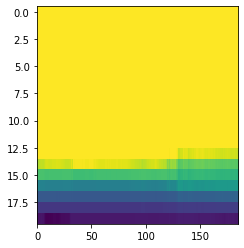

In [28]:
plt.imshow(occupancy[apop_ID]['spatial_occupancy_v_time_heatmap'], aspect = 10)

In [132]:
import pickle

In [134]:
with open('/home/nathan/data/kraken/h2b/giulia/apoptosis_information/spatial_occupancy_weightmaps/follow/occupancy_dict.p', 'wb') as fp:
    pickle.dump(occupancy, fp, protocol=pickle.HIGHEST_PROTOCOL)

# average spatial occupancy

concatenating all spatial occupancy at moment of apoptosis, finding average spatial bin where occupancy<1

In [97]:
spa_occ_hm_per_apop_ID = np.zeros((20,len(occupancy)))
for i, apop_ID in enumerate(occupancy):
    apop_time = occupancy[apop_ID]['apop_time']
    apop_index = apop_time - occupancy[apop_ID]['frame_indices'][0]
    try:
        apop_spa_occ = occupancy[apop_ID]['spatial_occupancy_v_time_heatmap'][:,apop_index-1]
    except:
        apop_spa_occ = np.zeros(20)
    spa_occ_hm_per_apop_ID[:,i] = apop_spa_occ ### this will be a heatmap of x = spa occ of apop_ID at apoptosis, y = spa bin
    

In [98]:
i

1635

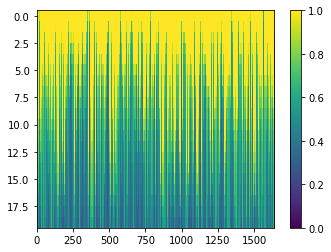

In [101]:
plt.imshow(spa_occ_hm_per_apop_ID, aspect =75)
plt.colorbar()

In [127]:
spatial_bin_less1 = []
for i,j in enumerate(spa_occ_hm_per_apop_ID[0,:]):
    for l,k in enumerate(spa_occ_hm_per_apop_ID[:,i]):
        if k<1:
            spatial_bin_less1.append(l)
            break

In [128]:
spatial_bin_less1

[7,
 4,
 2,
 11,
 6,
 6,
 2,
 1,
 9,
 9,
 9,
 6,
 11,
 12,
 1,
 2,
 12,
 0,
 9,
 8,
 8,
 4,
 6,
 3,
 9,
 6,
 4,
 6,
 5,
 1,
 7,
 2,
 3,
 5,
 5,
 9,
 11,
 5,
 7,
 0,
 2,
 1,
 2,
 12,
 6,
 8,
 14,
 14,
 1,
 0,
 2,
 1,
 3,
 3,
 7,
 9,
 1,
 6,
 5,
 5,
 6,
 2,
 3,
 1,
 5,
 5,
 8,
 7,
 6,
 5,
 0,
 6,
 6,
 9,
 11,
 0,
 9,
 2,
 0,
 3,
 4,
 10,
 6,
 7,
 6,
 8,
 6,
 5,
 7,
 11,
 9,
 9,
 5,
 7,
 8,
 10,
 1,
 3,
 2,
 9,
 0,
 3,
 7,
 1,
 1,
 3,
 6,
 5,
 5,
 2,
 3,
 2,
 3,
 4,
 5,
 7,
 9,
 0,
 11,
 10,
 10,
 9,
 4,
 3,
 11,
 6,
 3,
 1,
 7,
 4,
 8,
 2,
 3,
 7,
 6,
 5,
 6,
 1,
 3,
 0,
 12,
 1,
 11,
 3,
 3,
 12,
 5,
 13,
 7,
 7,
 0,
 0,
 10,
 2,
 3,
 3,
 6,
 1,
 0,
 4,
 3,
 6,
 8,
 5,
 2,
 1,
 5,
 1,
 2,
 11,
 3,
 10,
 4,
 9,
 9,
 12,
 3,
 1,
 6,
 7,
 3,
 2,
 3,
 7,
 9,
 11,
 0,
 14,
 14,
 13,
 2,
 5,
 2,
 11,
 9,
 6,
 8,
 8,
 7,
 1,
 4,
 1,
 5,
 7,
 6,
 8,
 0,
 6,
 9,
 4,
 9,
 9,
 3,
 7,
 8,
 8,
 1,
 4,
 8,
 6,
 14,
 2,
 3,
 6,
 6,
 2,
 4,
 11,
 5,
 4,
 2,
 6,
 5,
 2,
 3,
 0,
 3,
 2,
 0,
 3,
 6,
 4,
 

(array([234., 175., 299., 153., 145., 274., 112., 123.,  43.,  78.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

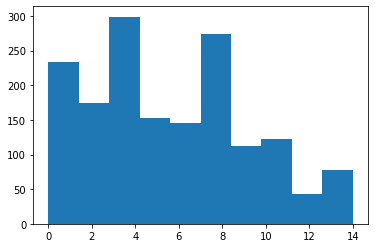

In [129]:
plt.hist(spatial_bin_less1)

# Cumulative probability of fractional occupancy

I.e. trying to understand how the apoptotic scan areas are distributed within the FOV

In [3]:
os.listdir('/media/nathan/Transcend/Nathan/data/kraken/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/')

['spatially_binned', 'occupancy_dict.p']

In [4]:
occupancy = pickle.load( open( '/media/nathan/Transcend/Nathan/data/kraken/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/occupancy_dict.p', "rb" ) )

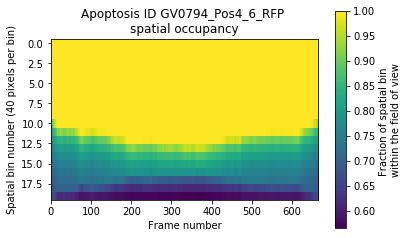

In [12]:
plt.imshow(occupancy['GV0794_Pos4_6_RFP']['spatial_occupancy_v_time_heatmap'], aspect = 20)
plt.xlabel('Frame number')
plt.ylabel('Spatial bin number (40 pixels per bin)')
plt.title('Apoptosis ID GV0794_Pos4_6_RFP \nspatial occupancy')
plt.colorbar(label = 'Fraction of spatial bin \nwithin the field of view')
plt.savefig('/media/nathan/Transcend/Nathan/data/kraken/h2b/apoptosis_information/spatial_occupancy_weightmaps/follow/GV0794_Pos4_6_RFP_spa_occ_map.pdf', bbox_to_inches = 'tight')

In [8]:
hm = occupancy['GV0794_Pos4_6_RFP']['spatial_occupancy_v_time_heatmap']

In [58]:
len(hm[0,:])

666

In [46]:
hm[:,10] ### this means print the entire column of the tenth row ## my big dumb brain always forgets this then spends ten mins trying to relearn it

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96522222, 0.86643535, 0.81709018, 0.78322909, 0.75735723,
       0.73660115, 0.71914619, 0.7045915 , 0.69176932, 0.65917571])

In [13]:
for i in occupancy:
    print(i)

GV0804_Pos4_179_RFP
GV0804_Pos4_249_RFP
GV0804_Pos4_110_RFP
GV0804_Pos4_292_RFP
GV0804_Pos4_342_RFP
GV0804_Pos4_343_RFP
GV0804_Pos4_231_RFP
GV0804_Pos4_339_RFP
GV0804_Pos4_333_RFP
GV0804_Pos4_353_RFP
GV0804_Pos4_351_RFP
GV0804_Pos4_163_RFP
GV0804_Pos4_217_RFP
GV0794_Pos4_6_RFP
GV0794_Pos4_73_RFP
GV0794_Pos4_70_RFP
GV0794_Pos7_52_RFP
GV0794_Pos7_192_RFP
GV0794_Pos7_329_RFP
GV0794_Pos7_360_RFP
GV0794_Pos7_429_RFP
GV0795_Pos4_1_RFP
GV0795_Pos4_7_RFP
GV0795_Pos4_284_RFP
GV0795_Pos4_235_RFP
GV0795_Pos4_234_RFP
GV0795_Pos4_285_RFP
GV0795_Pos4_323_RFP
GV0795_Pos4_78_RFP
GV0795_Pos4_359_RFP
GV0795_Pos4_423_RFP
GV0795_Pos4_49_RFP
GV0795_Pos4_432_RFP
GV0795_Pos4_3_RFP
GV0795_Pos4_419_RFP
GV0795_Pos4_487_RFP
GV0795_Pos4_355_RFP
GV0795_Pos4_418_RFP
GV0795_Pos4_35_RFP
GV0795_Pos4_309_RFP
GV0795_Pos4_636_RFP
GV0795_Pos4_703_RFP
GV0795_Pos7_390_RFP
GV0795_Pos7_421_RFP
GV0795_Pos7_460_RFP
GV0795_Pos7_680_RFP
GV0795_Pos7_874_RFP
GV0795_Pos7_873_RFP
GV0795_Pos7_255_RFP
GV0795_Pos7_850_RFP
GV0795_Pos7_10

In [14]:
threshold = 1
bin_threshold=[]
for apop_ID in tqdm(occupancy):
    hm = occupancy[apop_ID]['spatial_occupancy_v_time_heatmap'] ## load occupancy heatmap
    for n, col in enumerate(hm[0,:]): ## for each frame in heatmap
        for i,j in enumerate(hm[:,n]): ## for each spatial bin in each frame
            #print(i,j)
            if j<threshold: ## if the occupancy is less than one add it to list
                #print(i, j)
                bin_threshold.append(i+1)

100%|██████████| 1636/1636 [00:04<00:00, 373.70it/s]


Text(0.5, 1.0, 'Distribution of incomplete spatial bins')

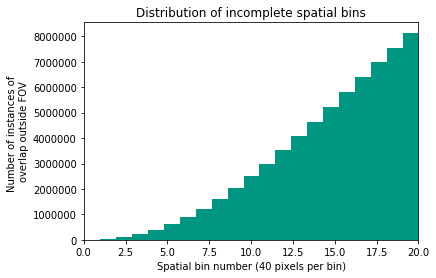

In [15]:
plt.hist(bin_threshold, bins = 20, cumulative = True, histtype='stepfilled', color = '#009782')
plt.xlim(0,20)
plt.xlabel('Spatial bin number (40 pixels per bin)')
plt.ylabel('Number of instances of \noverlap outside FOV')
plt.title('Distribution of incomplete spatial bins')

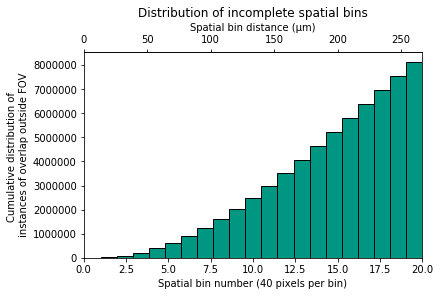

In [18]:
fig, ax = plt.subplots(constrained_layout=True)
values, base = np.histogram(bin_threshold, bins=20, density = True)
ax.hist(bin_threshold, bins = 20, cumulative = True, histtype='bar', color = '#009782', ec='black')
ax.set_xlabel('Spatial bin number (40 pixels per bin)')
ax.set_ylabel('Cumulative distribution of \ninstances of overlap outside FOV')
ax.set_title('Distribution of incomplete spatial bins')
ax.set_xlim(0,20)

def bin2pix(base):
    return base * 40*0.3333
def pix2bin(base):
    return base * 1/40*0.3333


secax = ax.secondary_xaxis('top', functions=(bin2pix, pix2bin))
secax.set_xlabel('Spatial bin distance (μm)')
plt.savefig('/media/nathan/Transcend/Nathan/data/kraken/h2b/radial_analysis_output/scan_parameterisation/Cumulative Distribution of incomplete spatial bins.pdf')

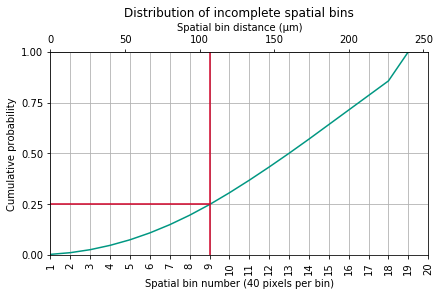

In [77]:
fig, ax = plt.subplots(constrained_layout=True)
values, base = np.histogram(bin_threshold, bins=19, density = True)
#ax.hist(bin_threshold, bins = 19, cumulative = True, histtype='bar', color = '#009782', ec='black')

cumulative = np.cumsum(values)
ax.plot(cumulative, c='#009782')

ax.set_xlabel('Spatial bin number (40 pixels per bin)')
ax.set_ylabel('Cumulative probability')
ax.set_yticks(np.linspace(0,1,5))
ax.set_xticks(ticks = np.linspace(0,19,20))
ax.set_xticklabels(labels = np.linspace(1,20,20, dtype=int), rotation = 'vertical')
ax.set_title('Distribution of incomplete spatial bins')

def bin2pix(base):
    return base * 40*0.3333
def pix2bin(base):
    return base * 1/40*0.3333

secax = ax.secondary_xaxis('top', functions=(bin2pix, pix2bin))
secax.set_xlabel('Spatial bin distance (μm)')

## lazy way to plot IQ range bc running out of time
#plt.axvline(x=15, ymin = 0, ymax = 1) ## ??????
plt.axvline(x=8, ymin=0, ymax = 1, c = '#d00027')
plt.axhline(y=0.25, xmin = 0, xmax =8/20+0.02, c = '#d00027')
#plt.axhline(y=0.75, xmin = 0, xmax =15/20+0.01)

plt.ylim(0,1)
plt.xlim(0,19)

plt.grid(which = 'both')

plt.savefig('/media/nathan/Transcend/Nathan/data/kraken/h2b/radial_analysis_output/scan_parameterisation/Cumulative Probability Distribution of incomplete spatial bins.pdf')